In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
output_dir_ccle = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT'

In [5]:
os.chdir(output_dir_ccle)

In [6]:
Histologies = [item1 for item1 in os.listdir() if os.path.isdir(item1)]

In [7]:
Histologies

['carcinoid-endocrine_tumour',
 'carcinoma',
 'chondrosarcoma',
 'Ewings_sarcoma-peripheral_primitive_neuroectodermal_tumour',
 'fibrosarcoma',
 'glioma',
 'haematopoietic_neoplasm',
 'lymphoid_neoplasm',
 'malignant_fibrous_histiocytoma-pleomorphic_sarcoma',
 'malignant_melanoma',
 'mesothelioma',
 'neuroblastoma',
 'osteosarcoma',
 'other',
 'primitive_neuroectodermal_tumour-medulloblastoma',
 'rhabdoid_tumour',
 'rhabdomyosarcoma',
 'sarcoma']

carcinoma
17-AAG
carcinoma
AEW541
carcinoma
AZD0530
carcinoma
AZD6244
carcinoma
Erlotinib
carcinoma
L-685458
carcinoma
Lapatinib
carcinoma
LBW242
carcinoma
Nilotinib
carcinoma
Paclitaxel
carcinoma
PD-0325901
carcinoma
PD-0332991
carcinoma
PF2341066
carcinoma
PLX4720
carcinoma
RAF265
carcinoma
Sorafenib
carcinoma
TAE684
carcinoma
TKI258
carcinoma
Topotecan
carcinoma
ZD-6474
glioma
TAE684
lymphoid_neoplasm
AEW541
lymphoid_neoplasm
L-685458
lymphoid_neoplasm
Lapatinib
lymphoid_neoplasm
Nilotinib
lymphoid_neoplasm
PD-0332991
lymphoid_neoplasm
PF2341066
lymphoid_neoplasm
RAF265
lymphoid_neoplasm
Sorafenib
lymphoid_neoplasm
TAE684
lymphoid_neoplasm
TKI258
lymphoid_neoplasm
ZD-6474
malignant_melanoma
17-AAG
malignant_melanoma
AZD6244
malignant_melanoma
Paclitaxel
malignant_melanoma
PD-0325901
malignant_melanoma
PLX4720
malignant_melanoma
RAF265
malignant_melanoma
TAE684
malignant_melanoma
TKI258
malignant_melanoma
Topotecan


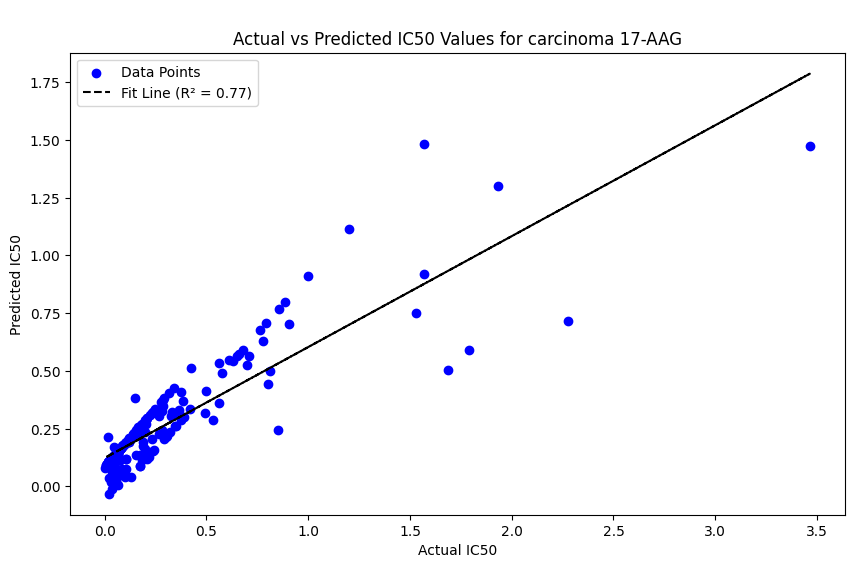

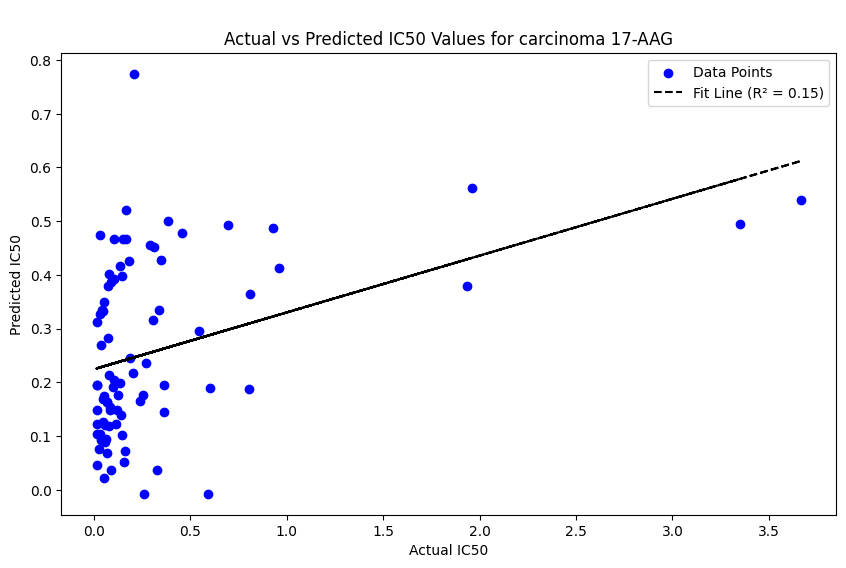

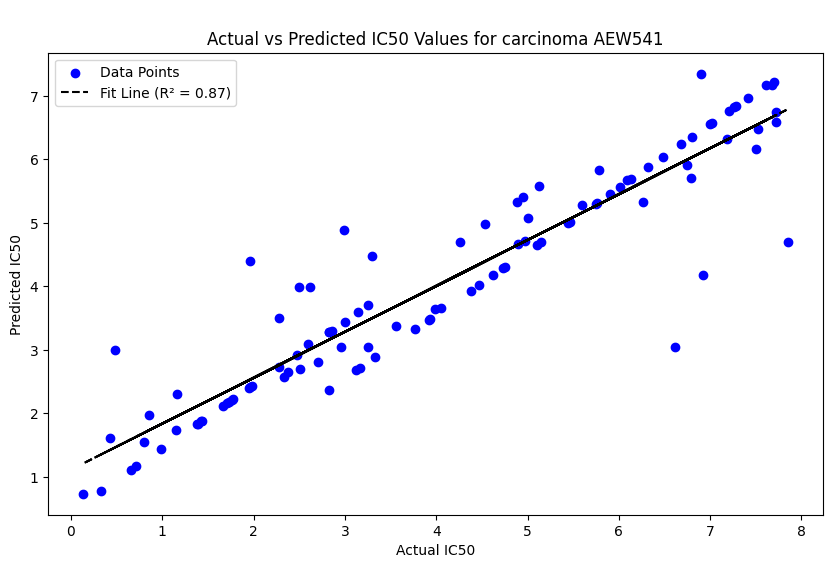

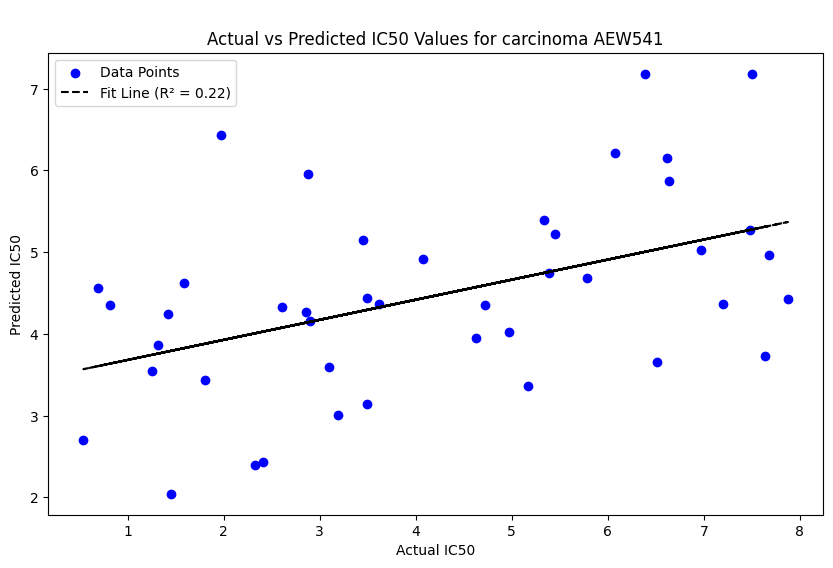

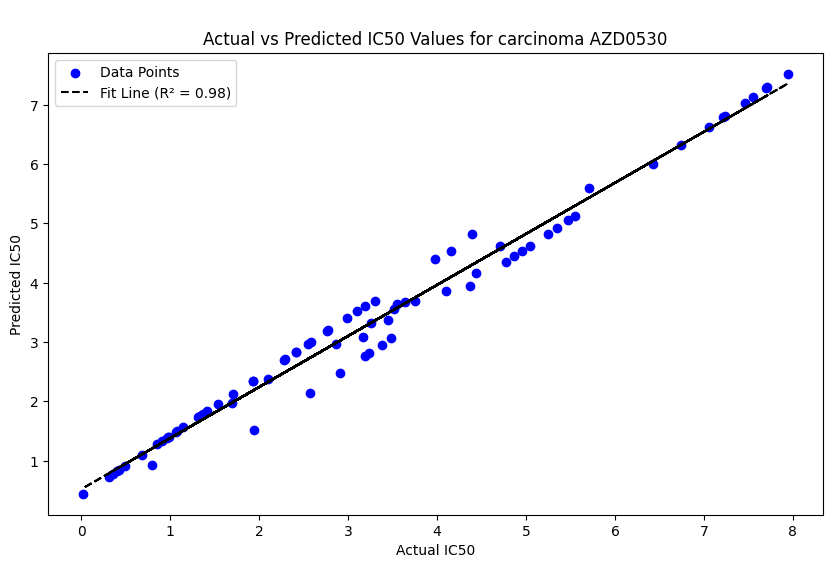

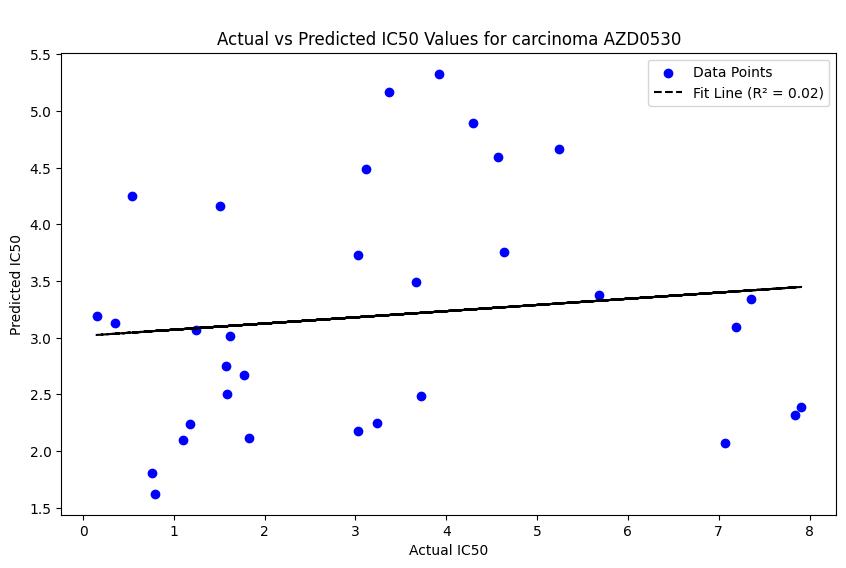

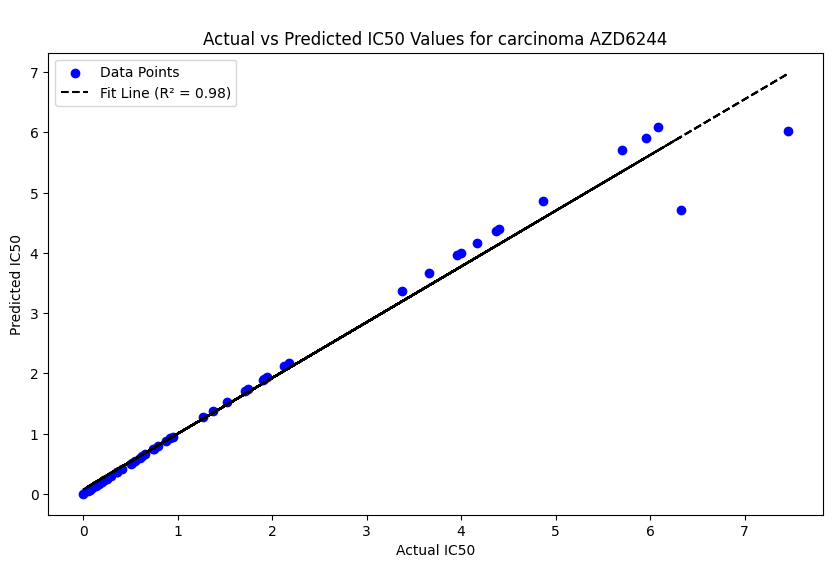

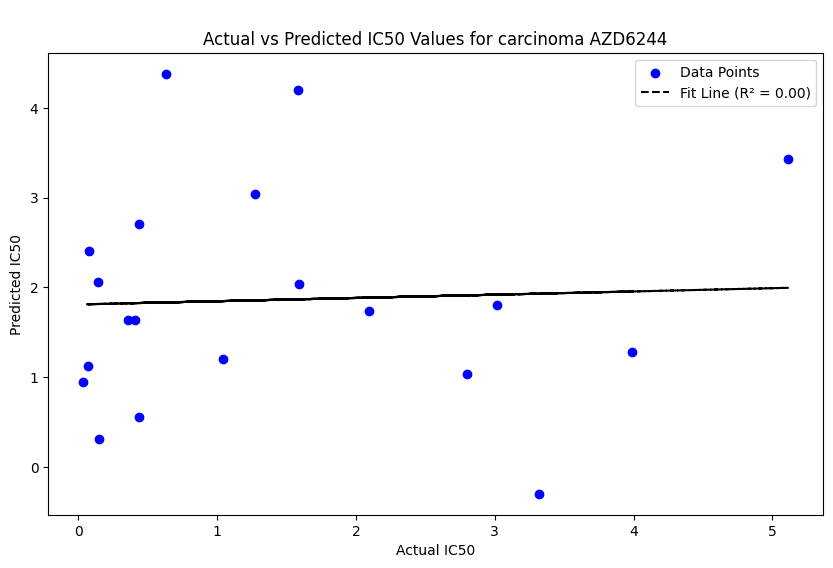

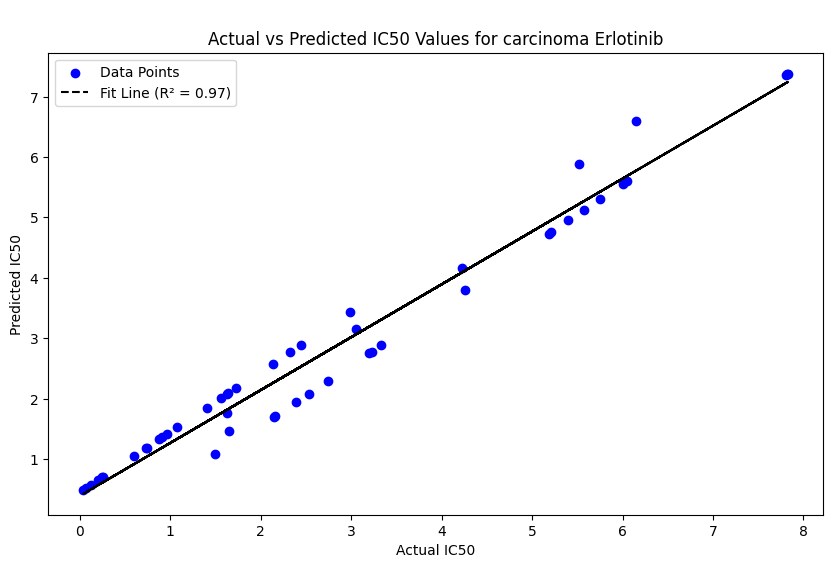

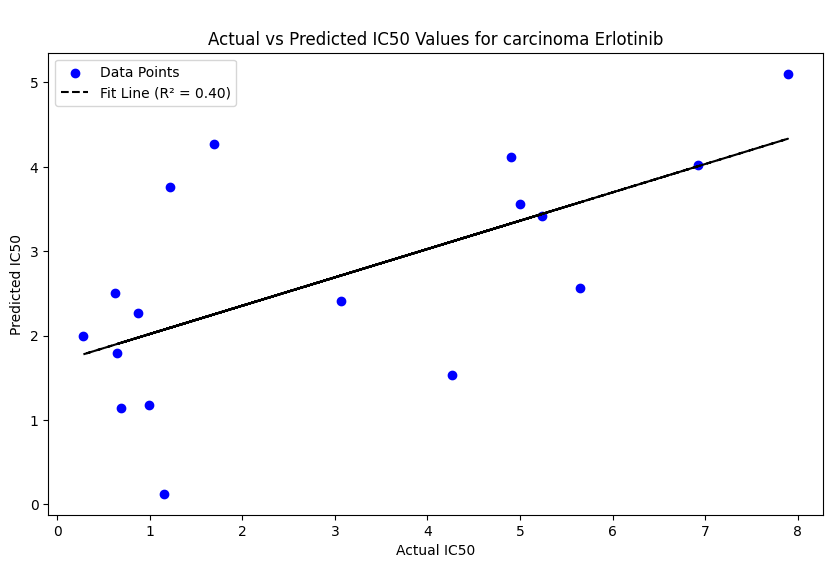

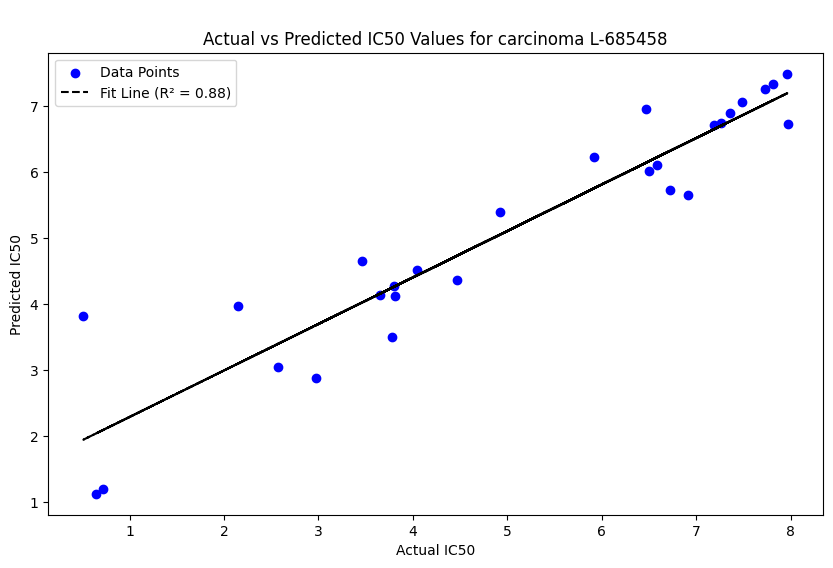

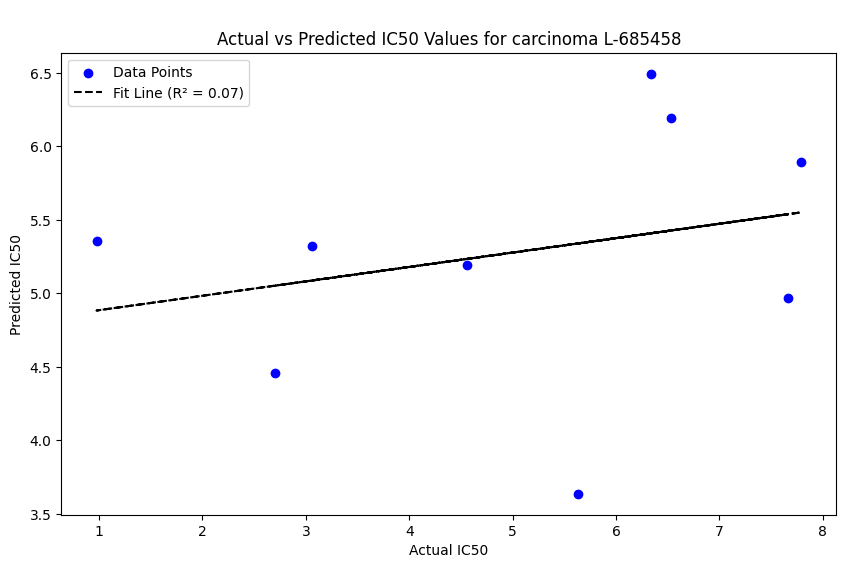

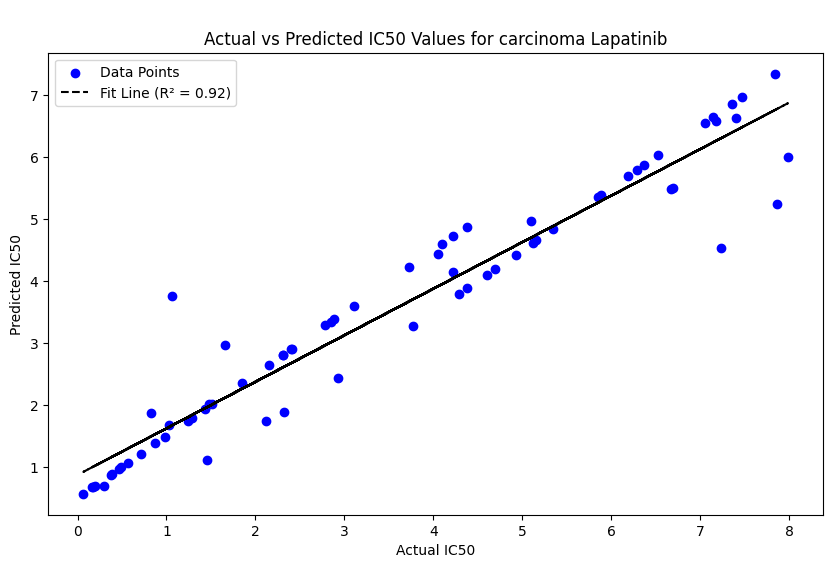

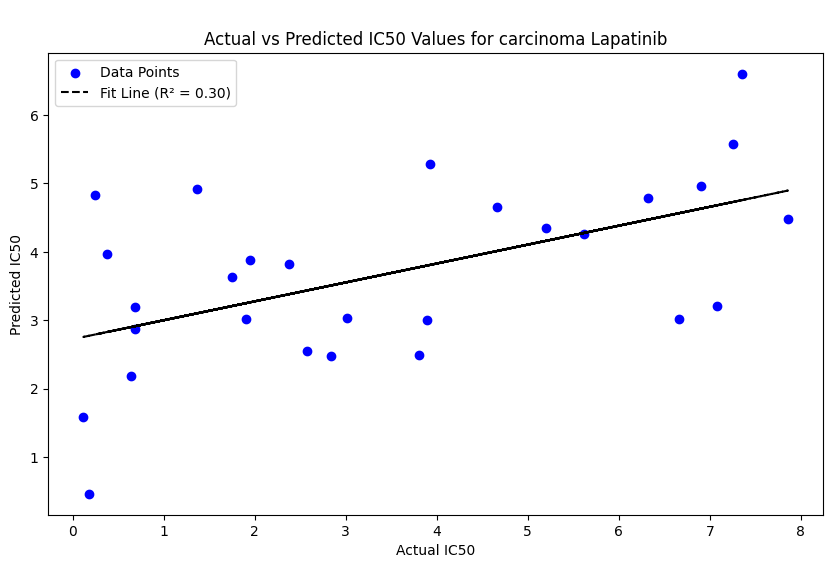

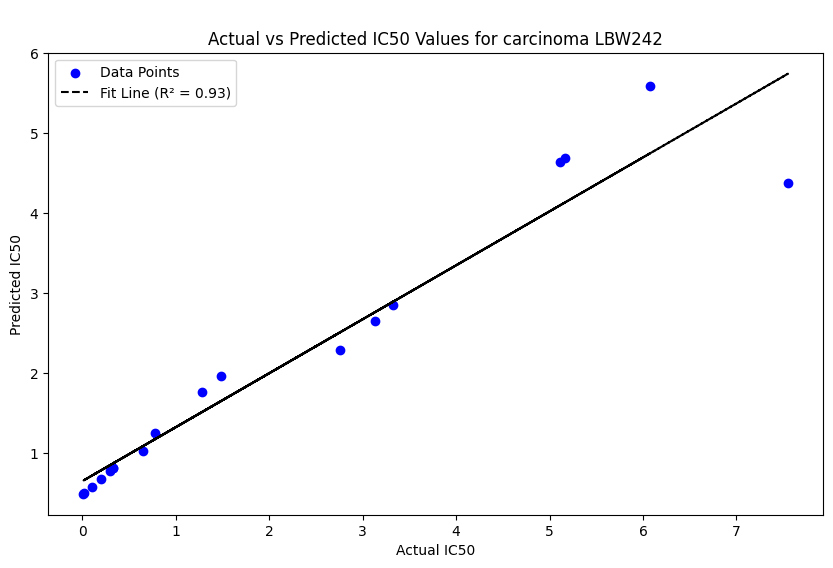

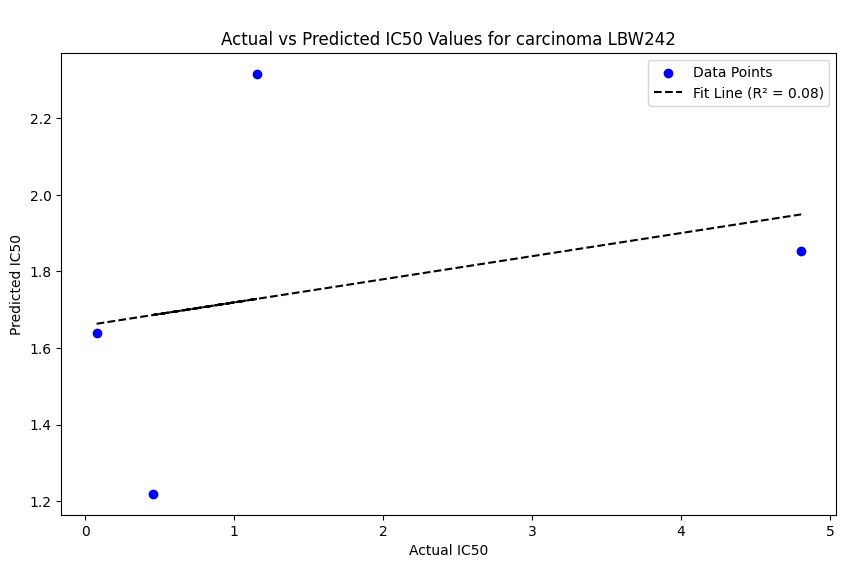

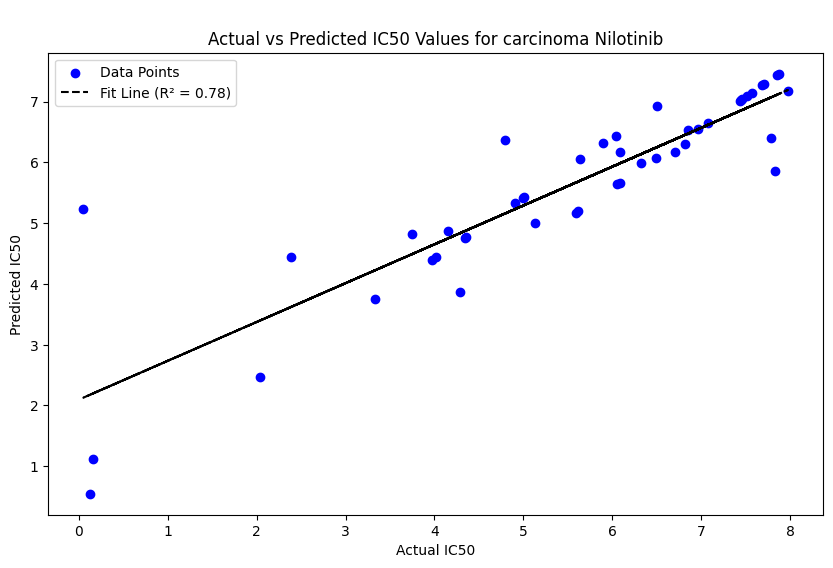

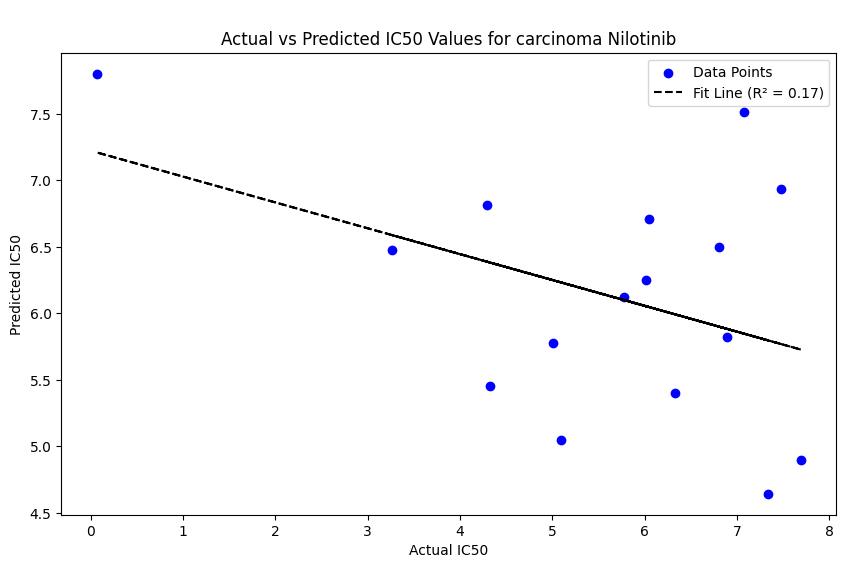

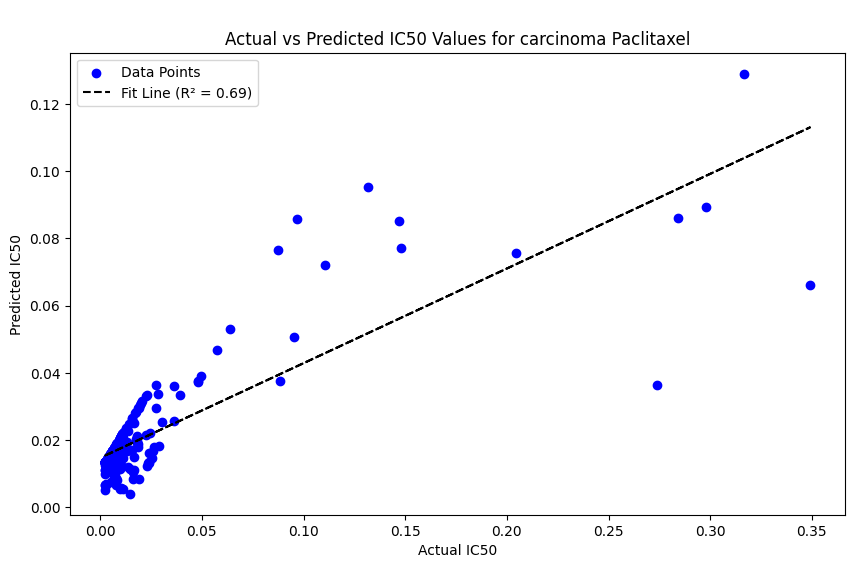

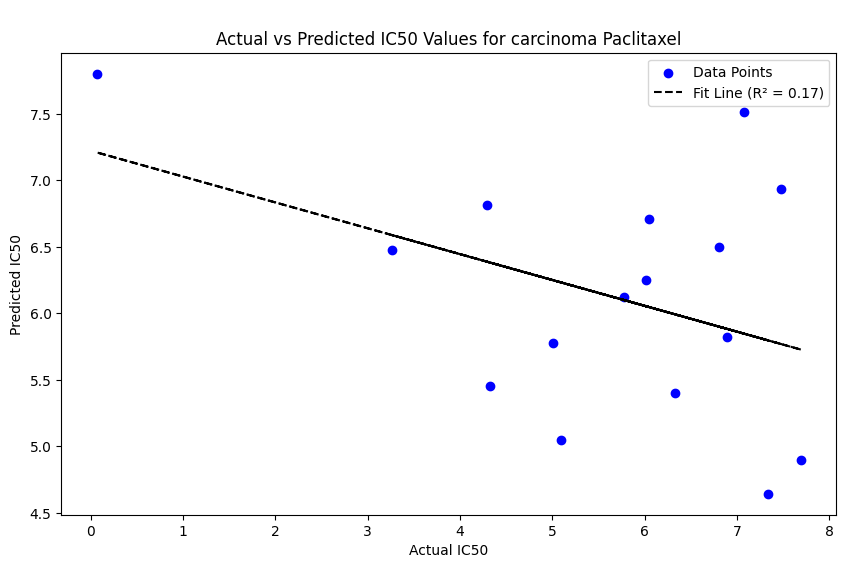

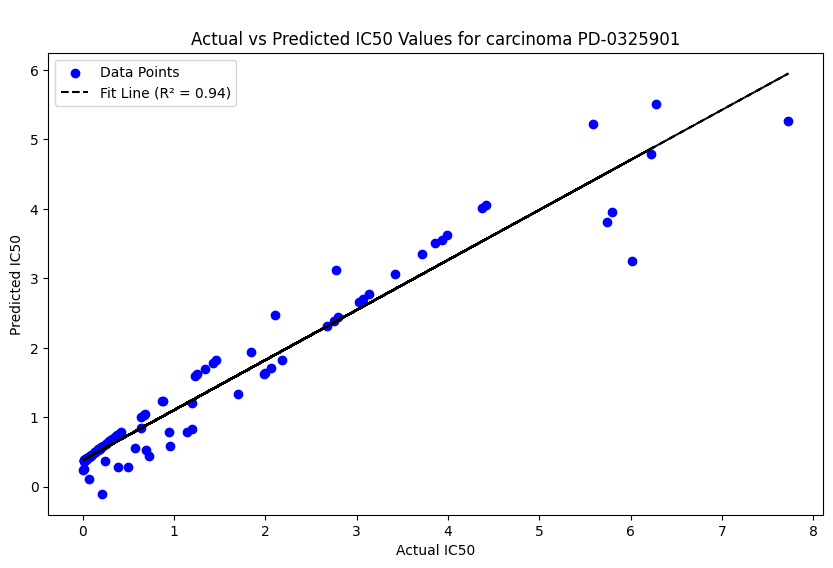

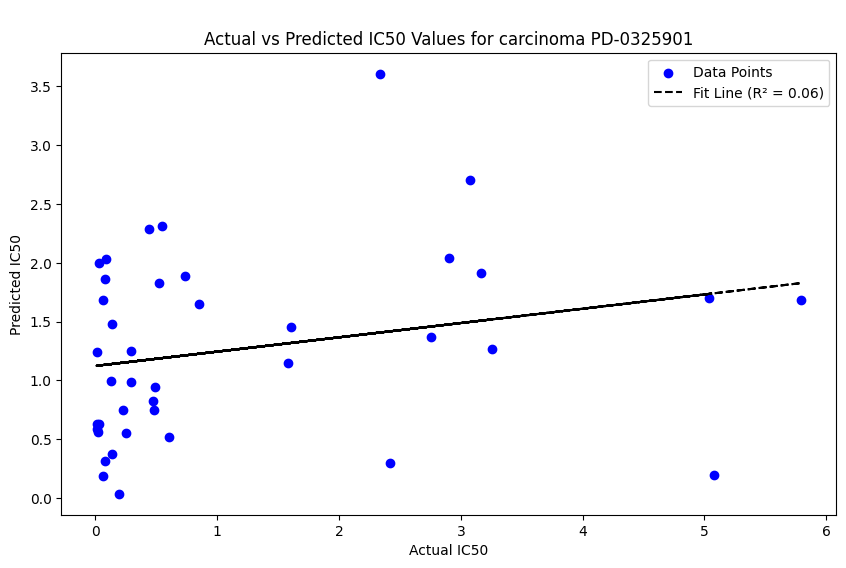

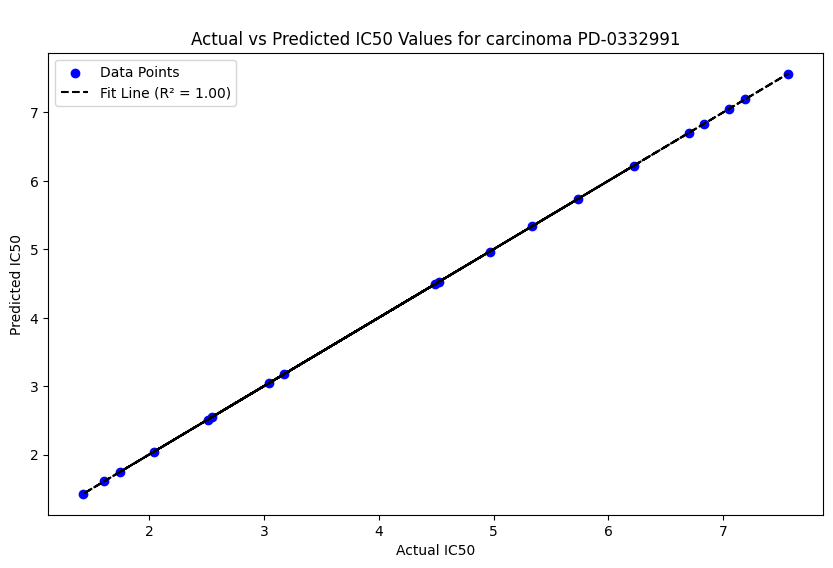

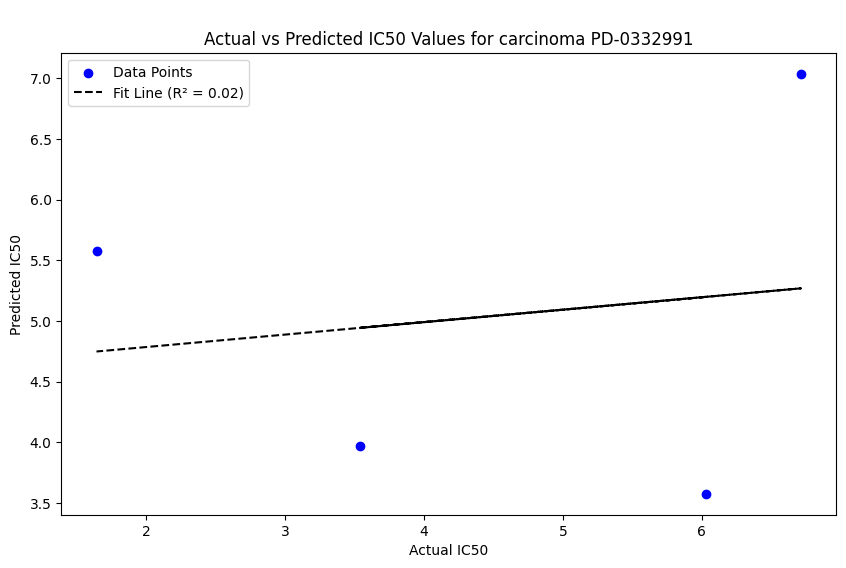

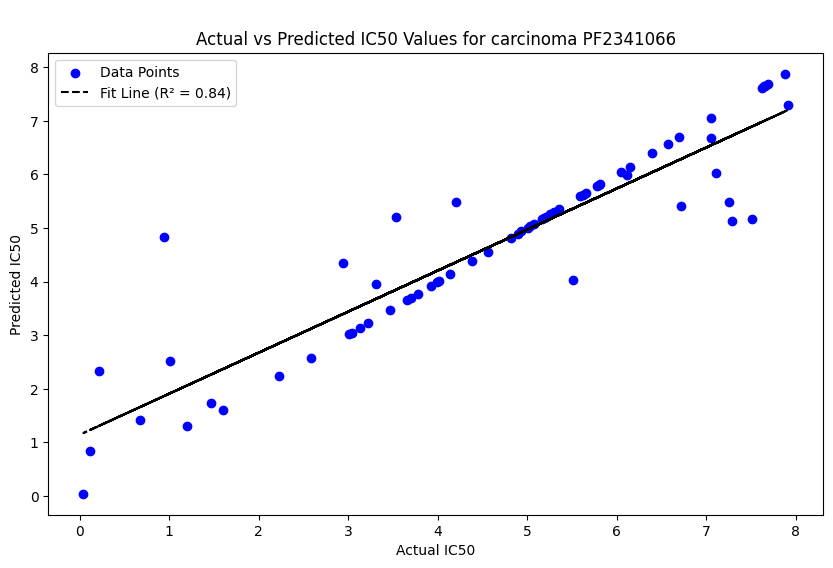

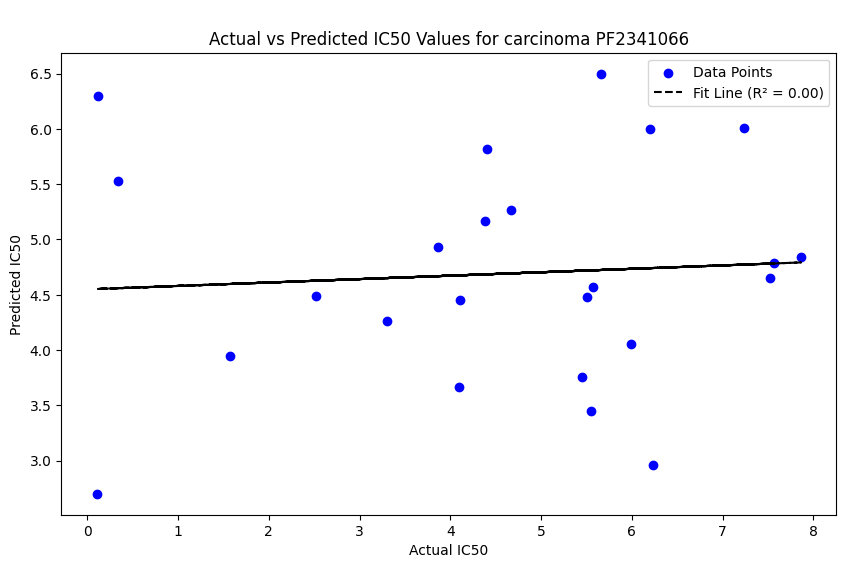

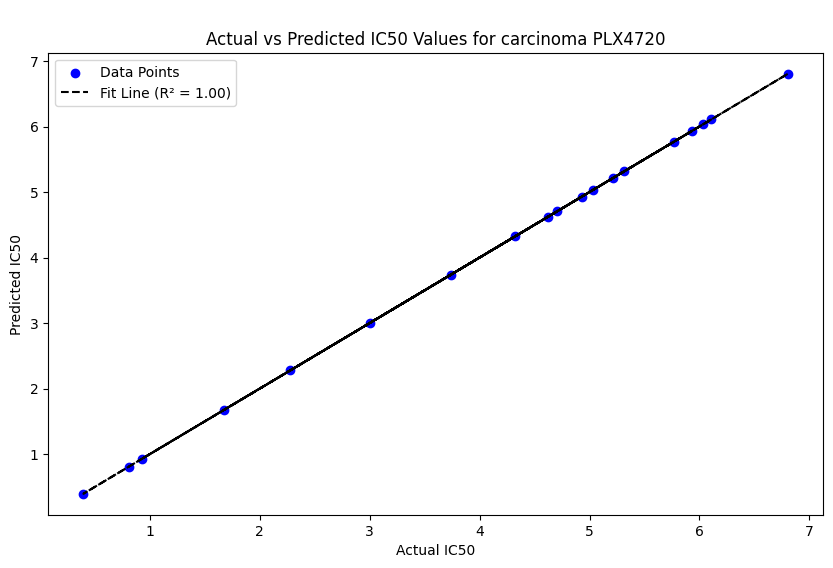

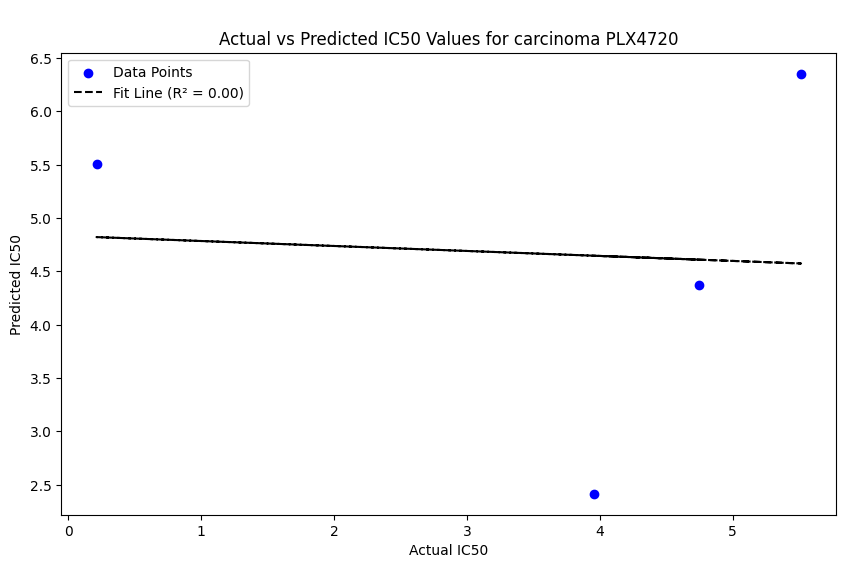

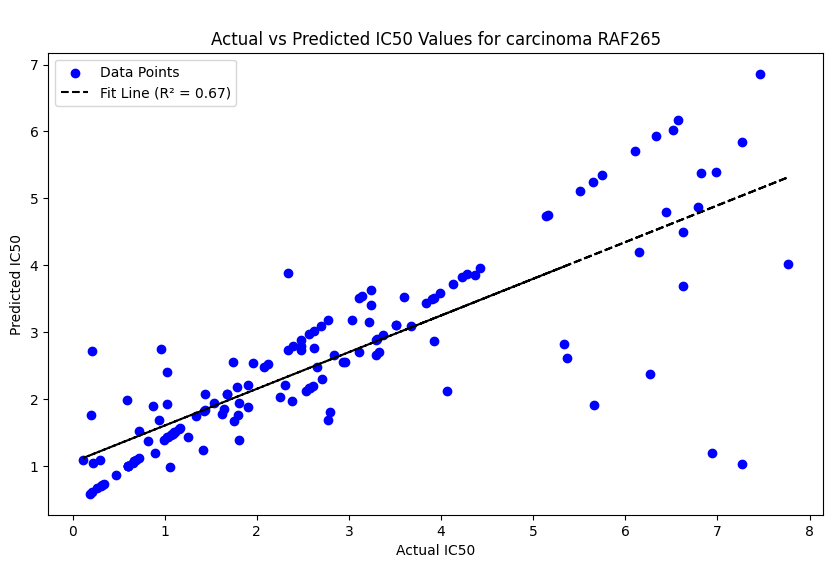

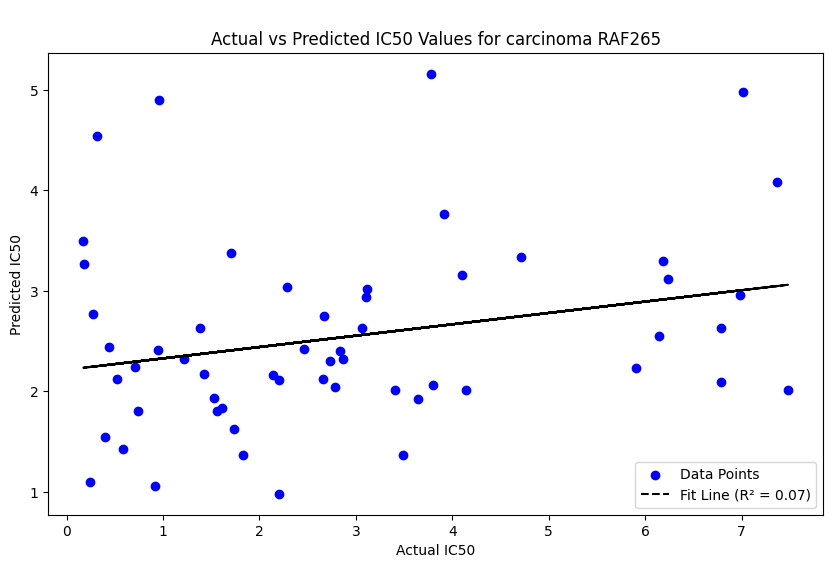

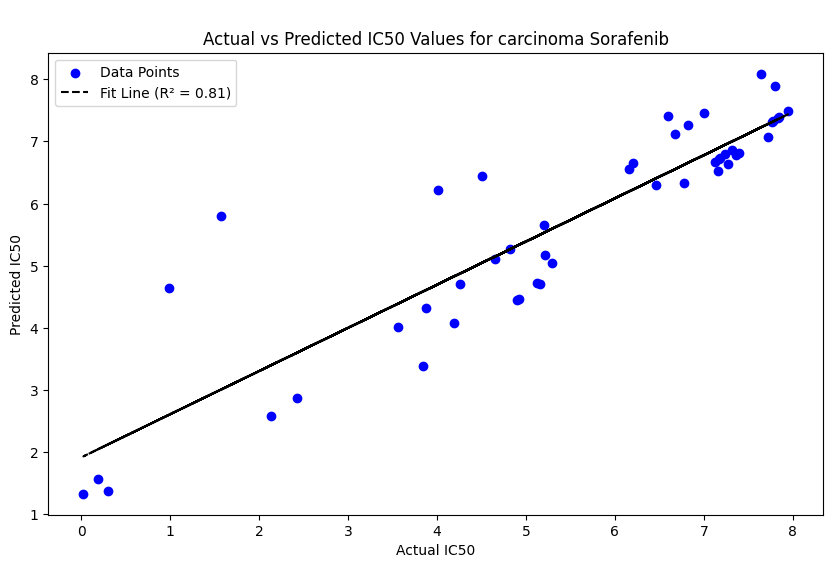

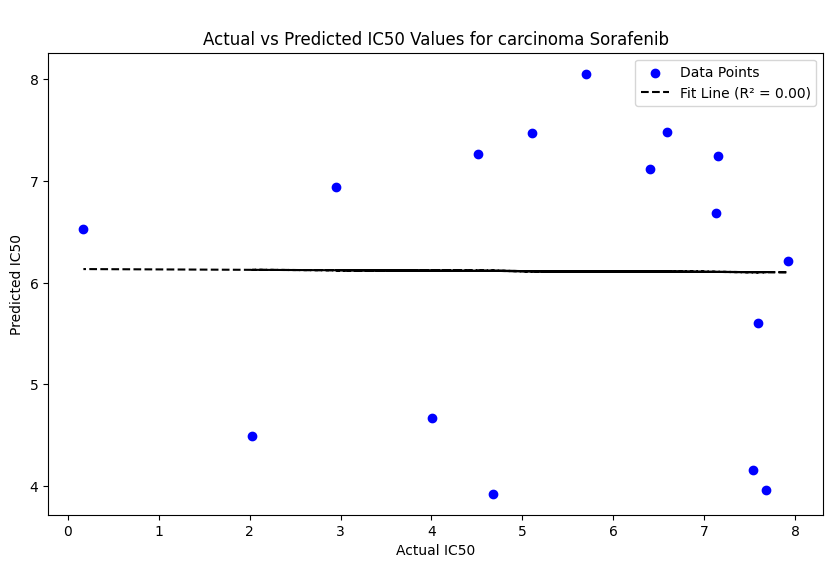

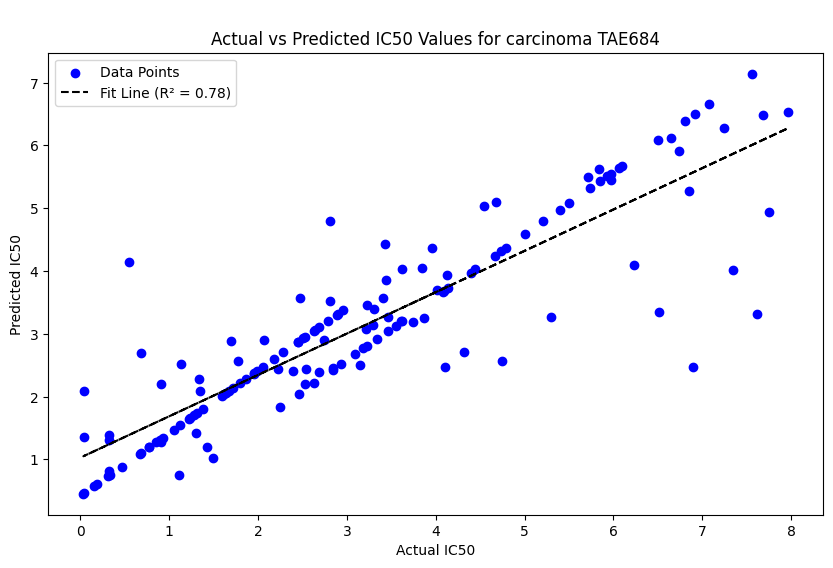

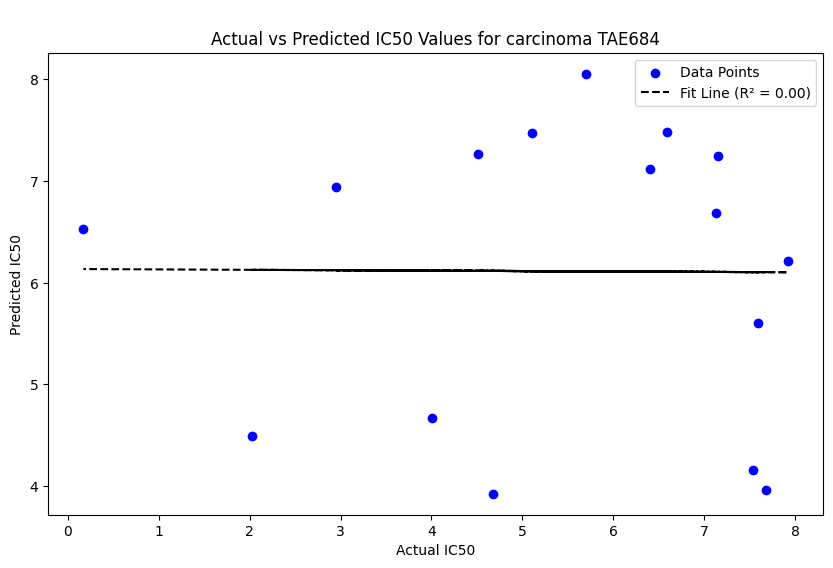

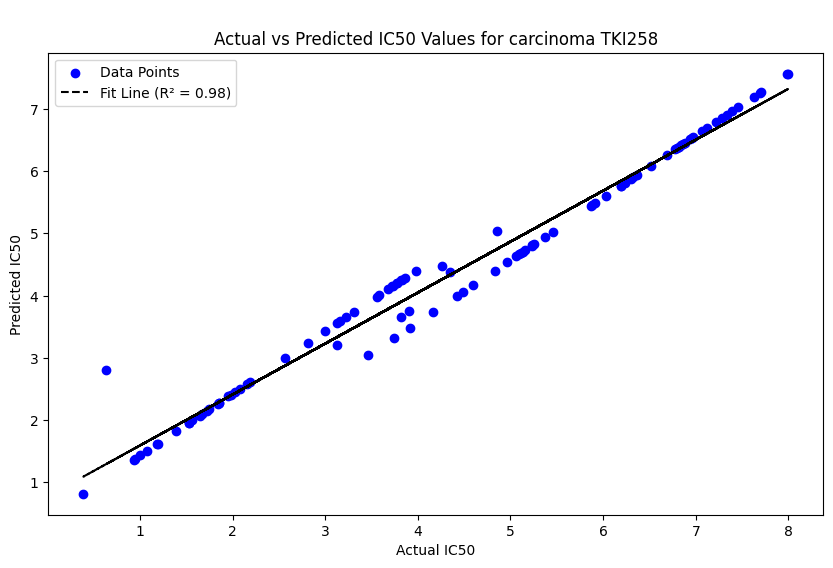

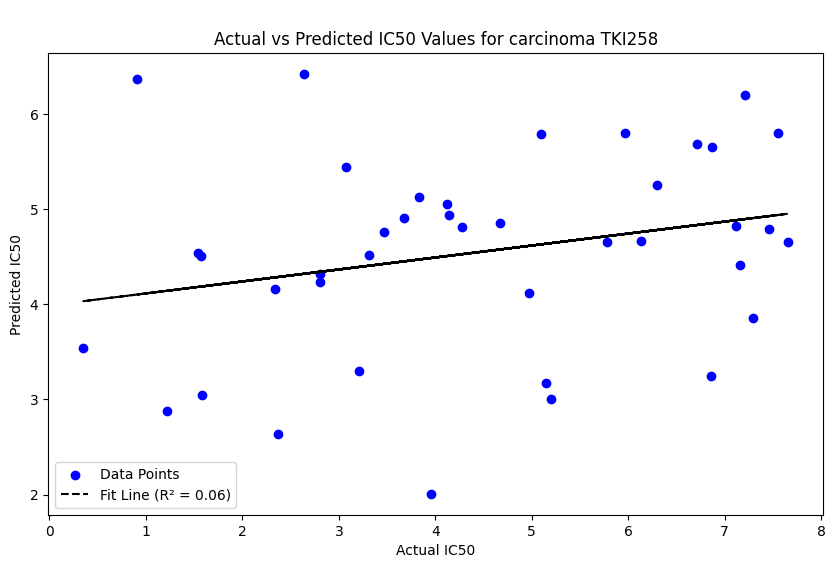

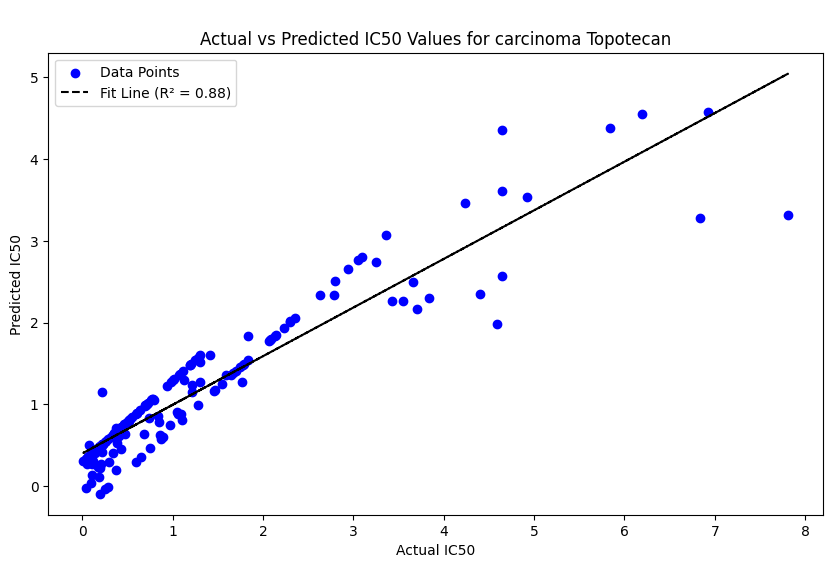

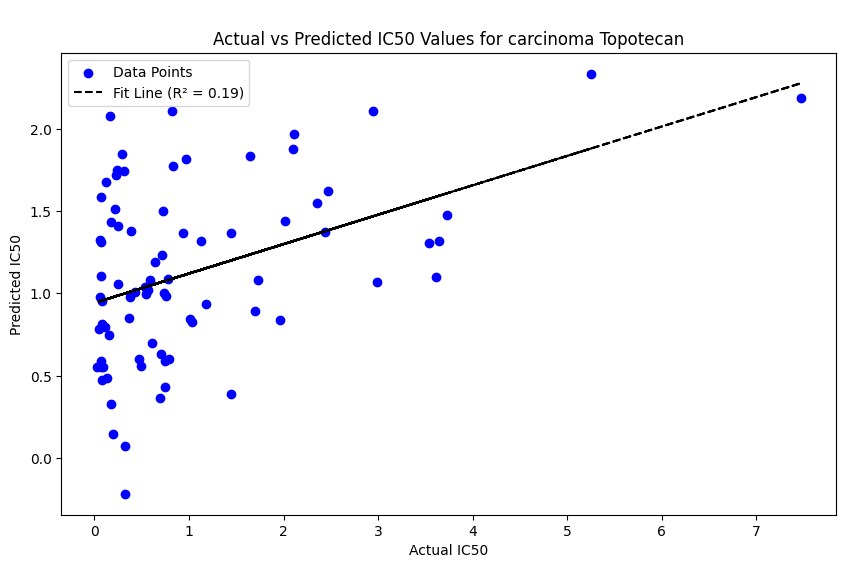

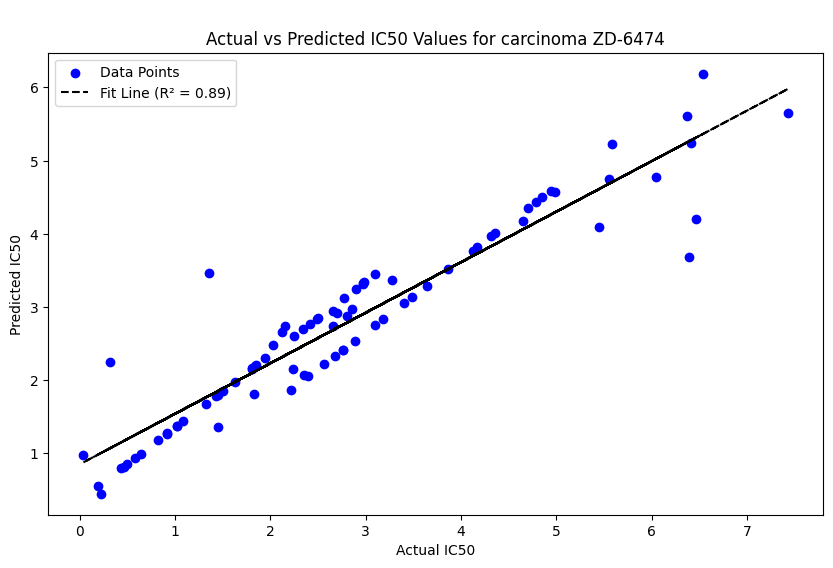

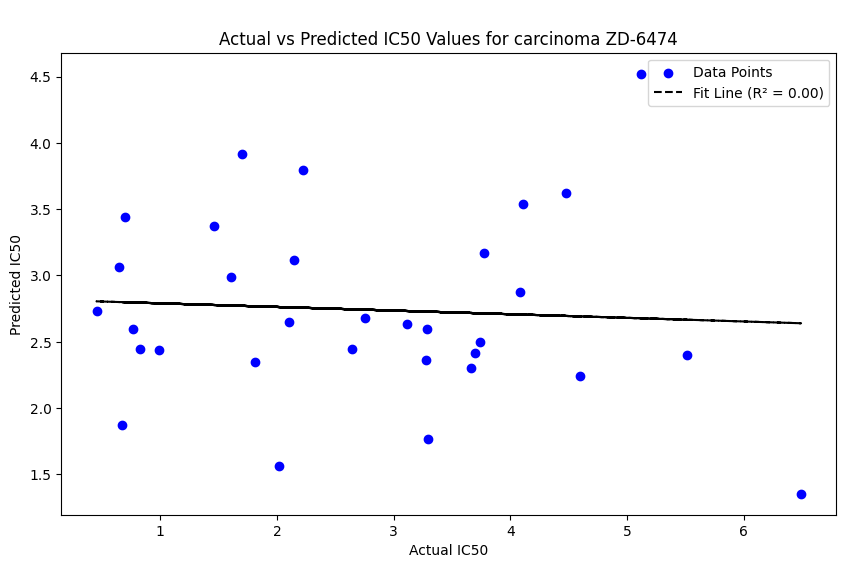

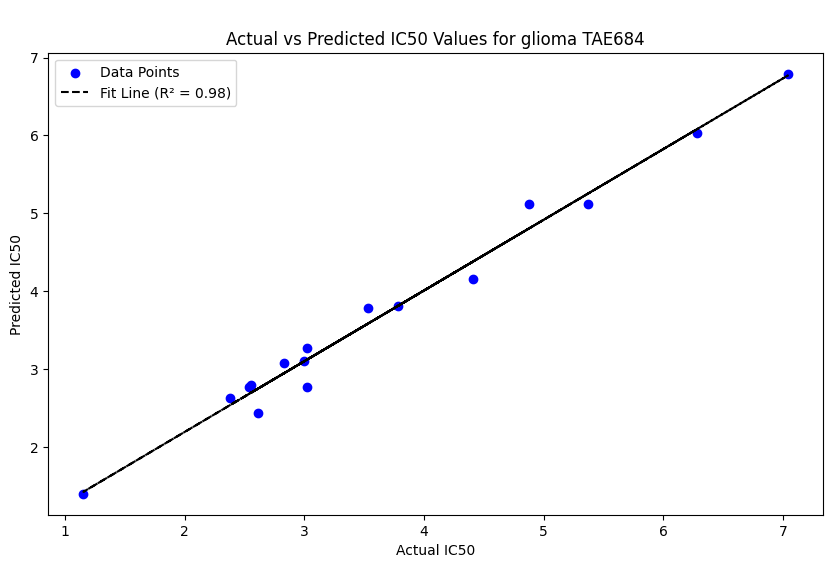

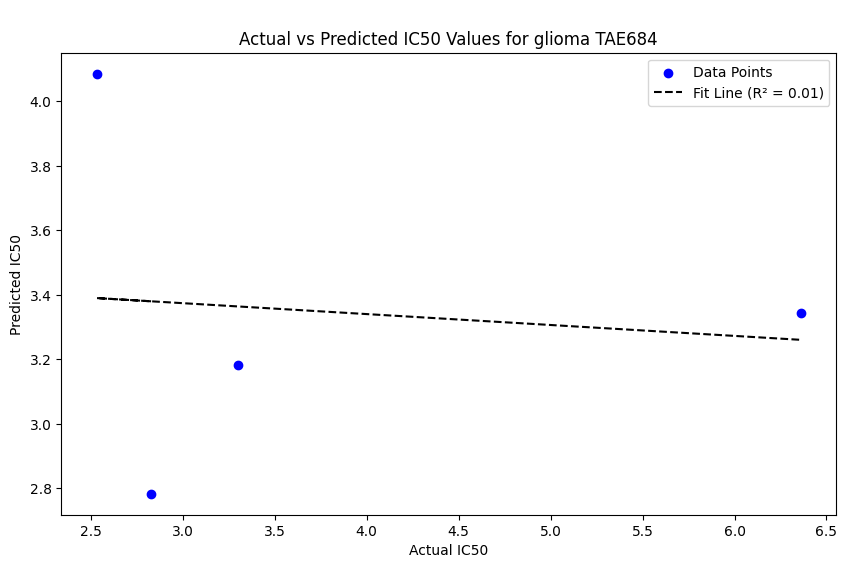

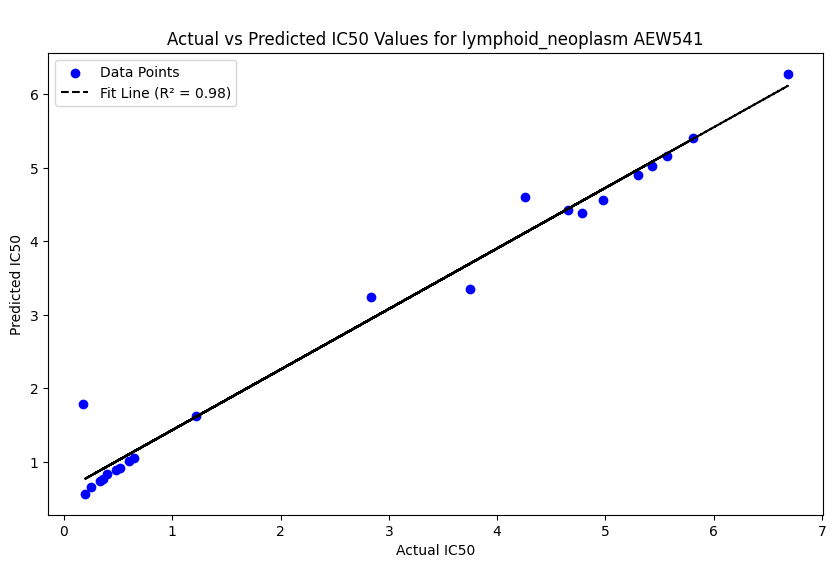

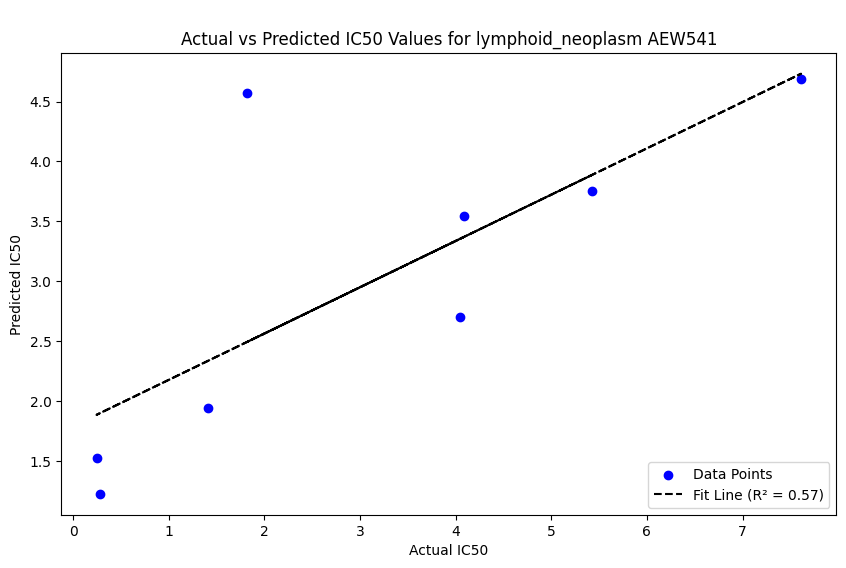

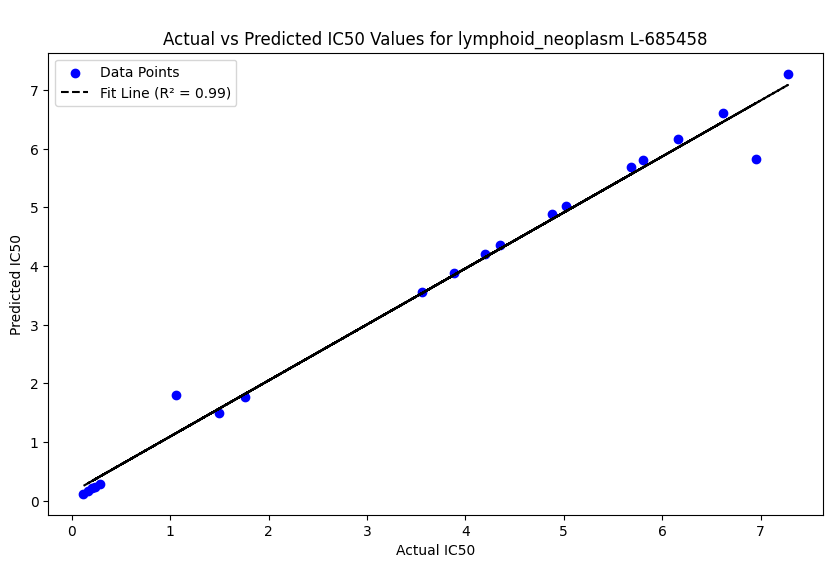

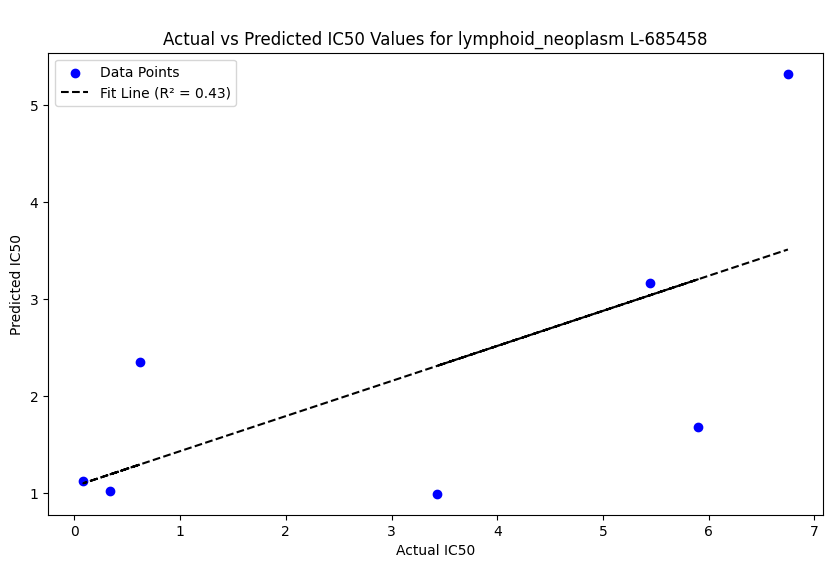

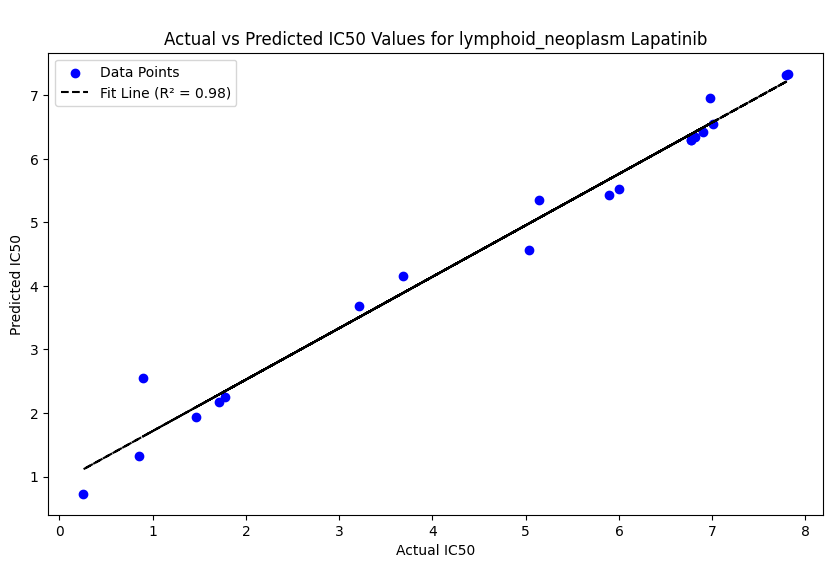

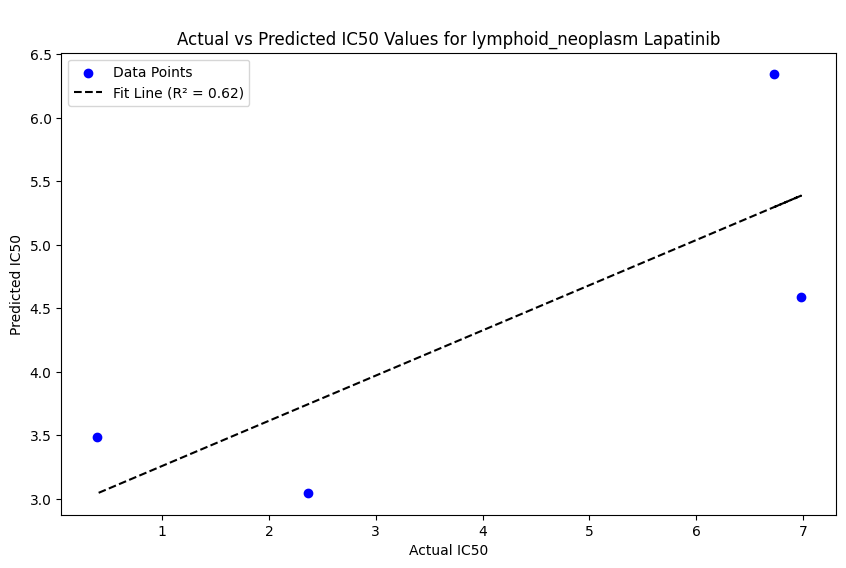

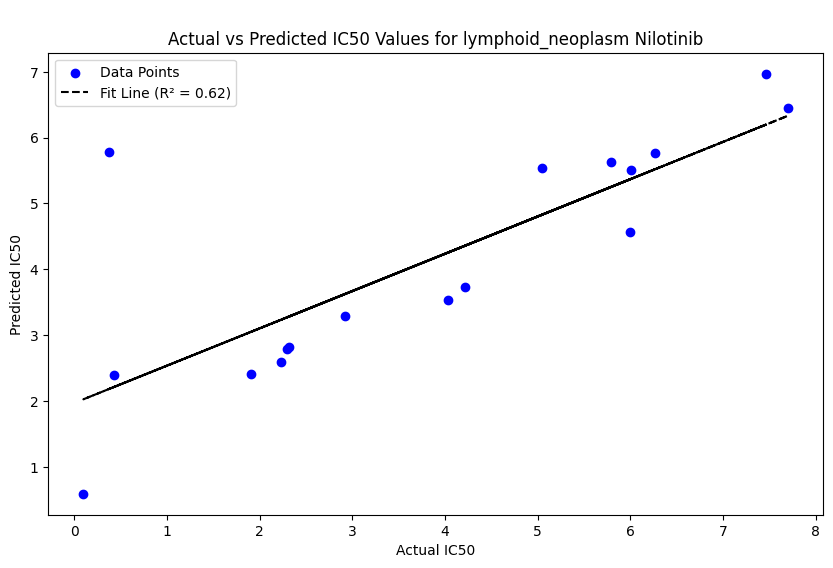

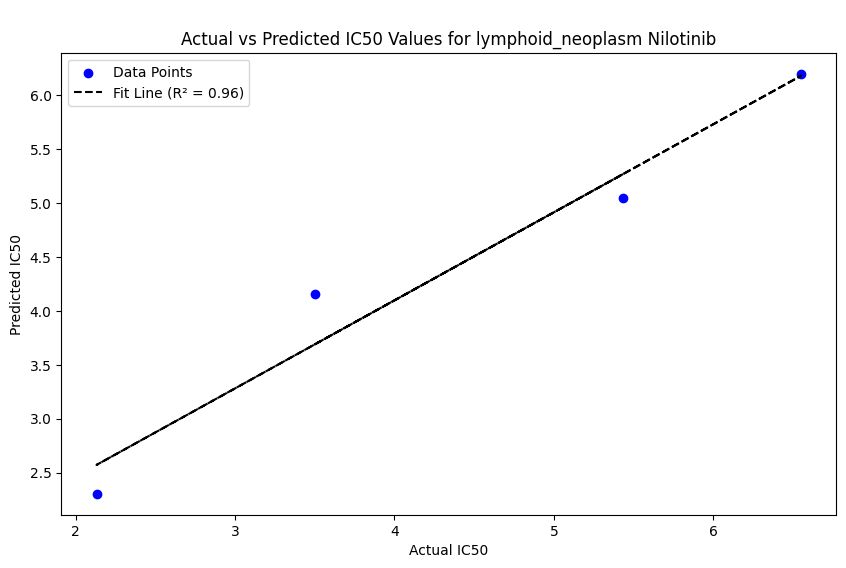

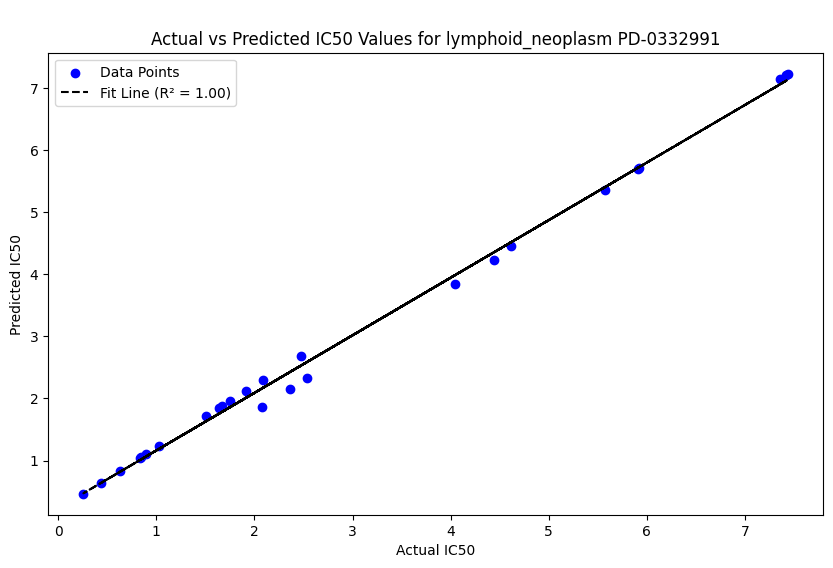

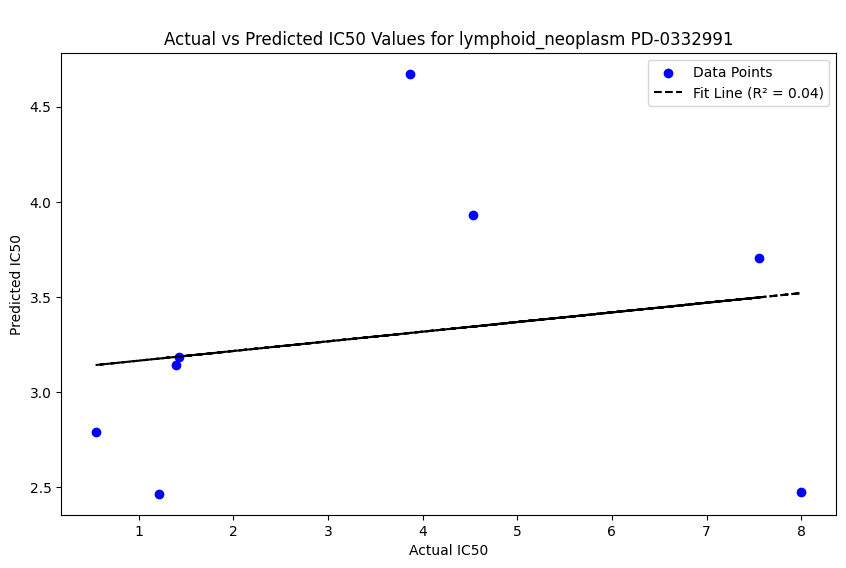

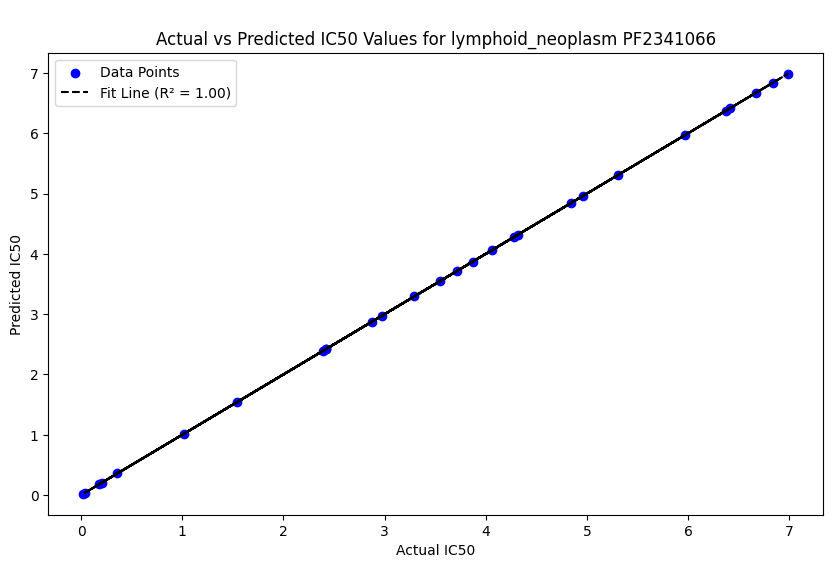

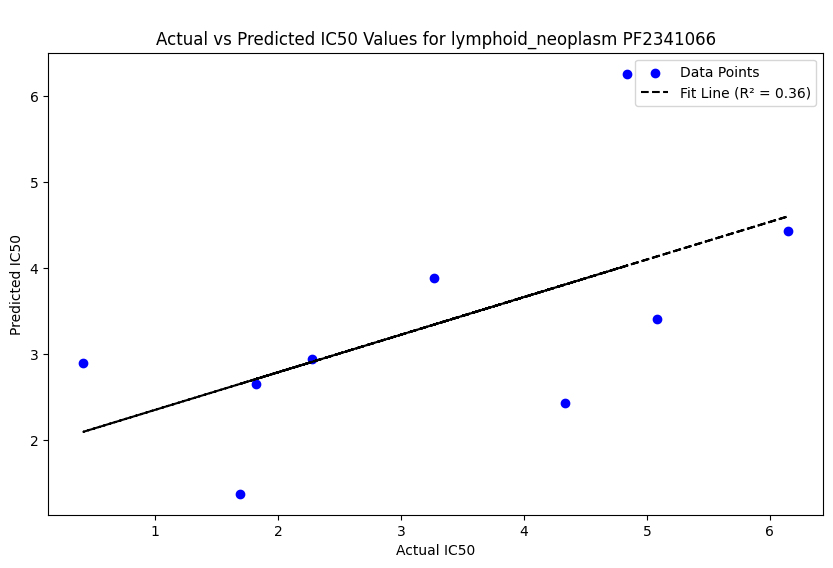

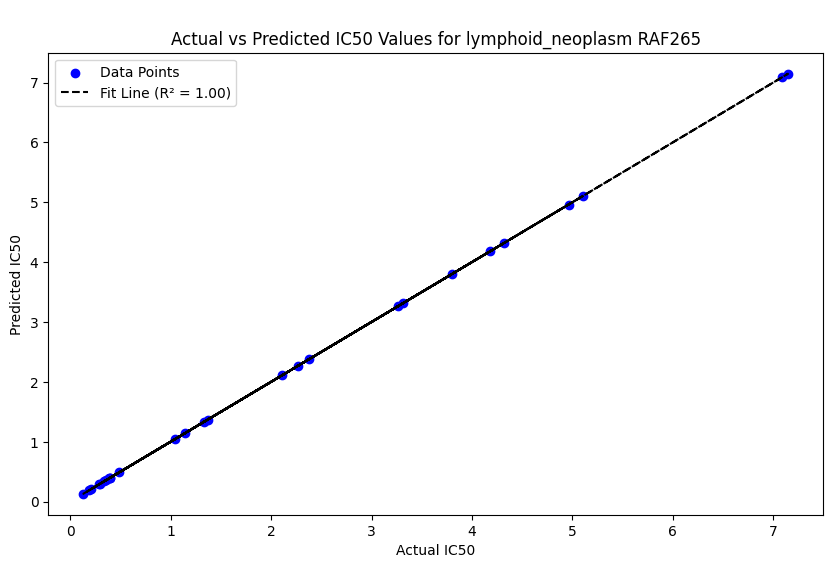

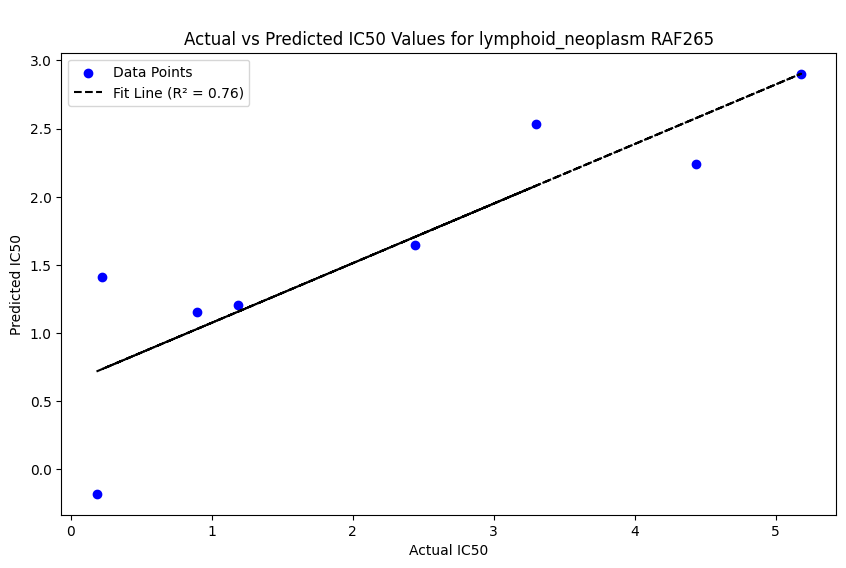

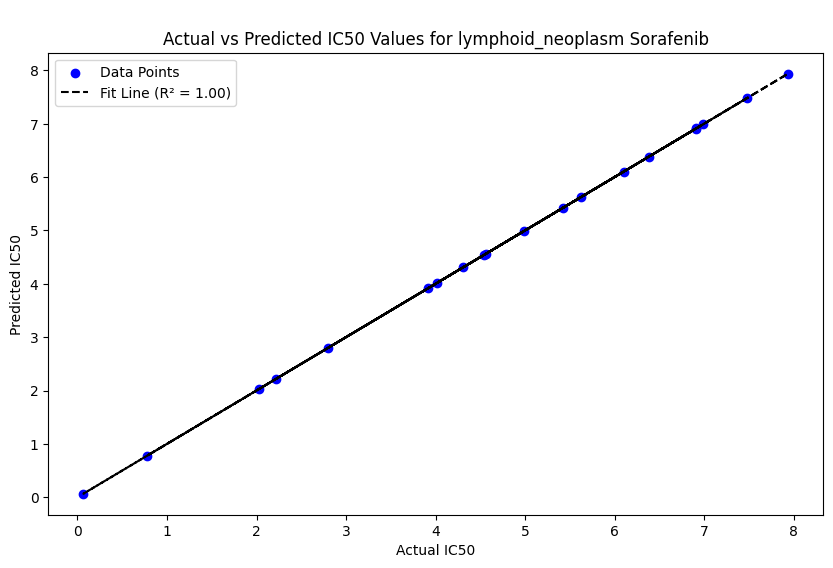

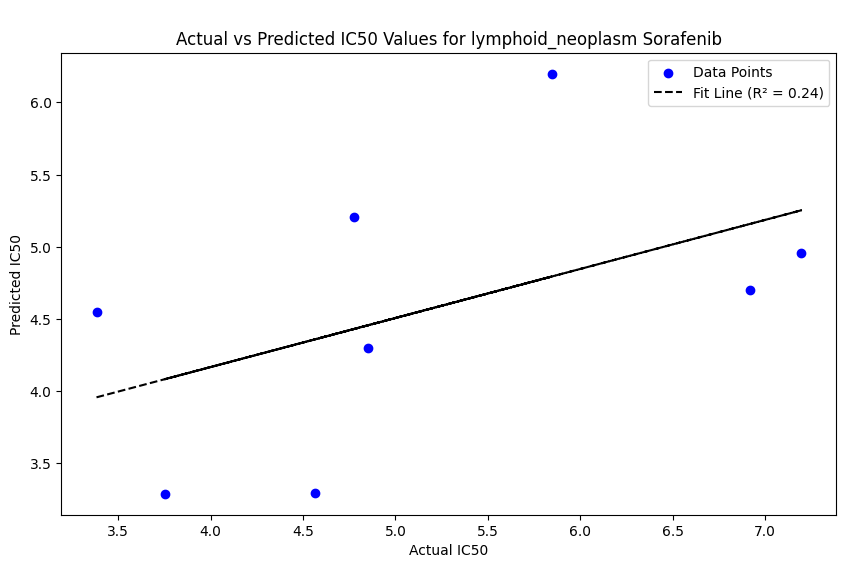

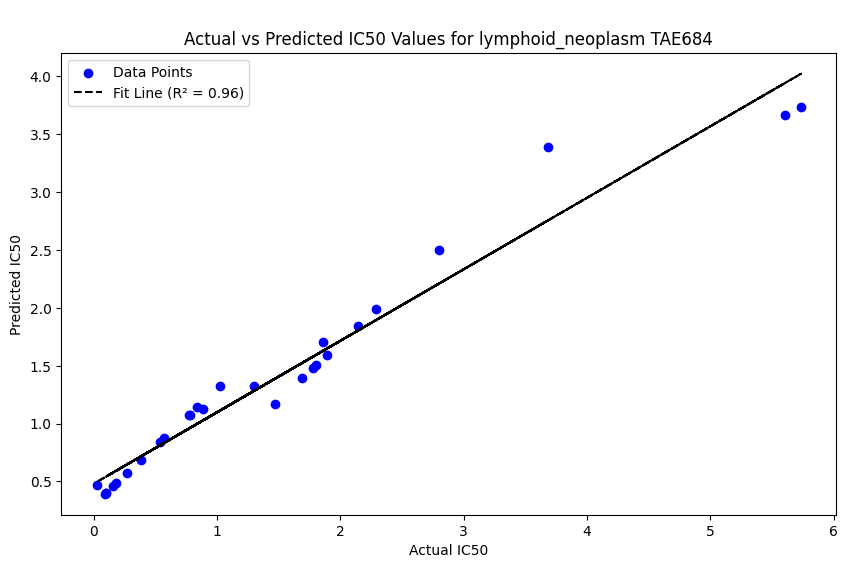

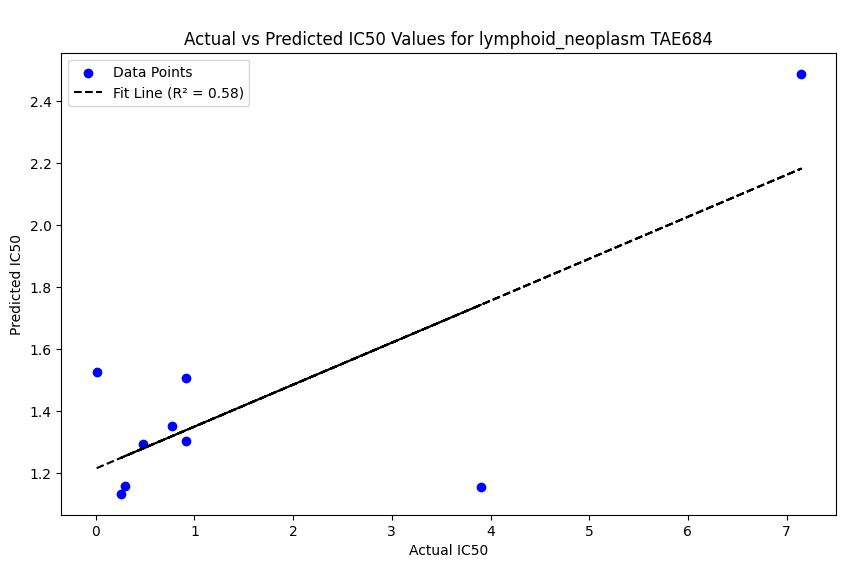

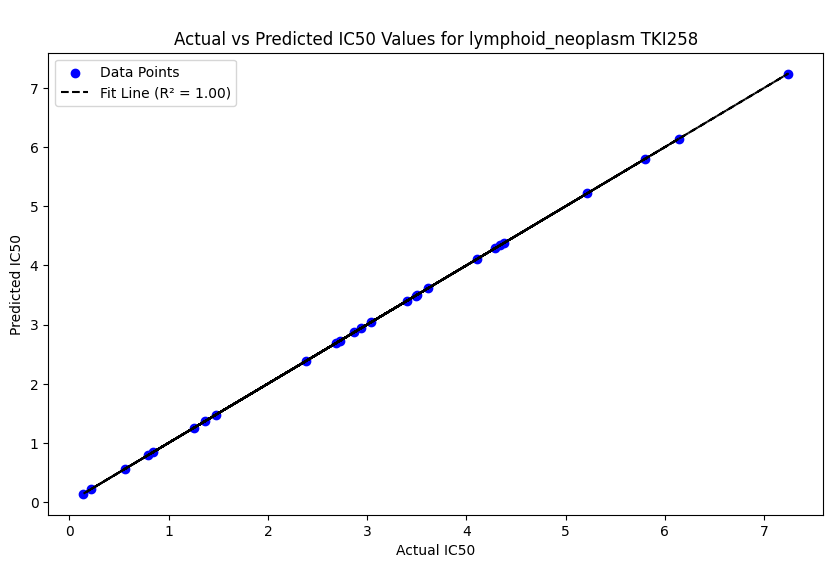

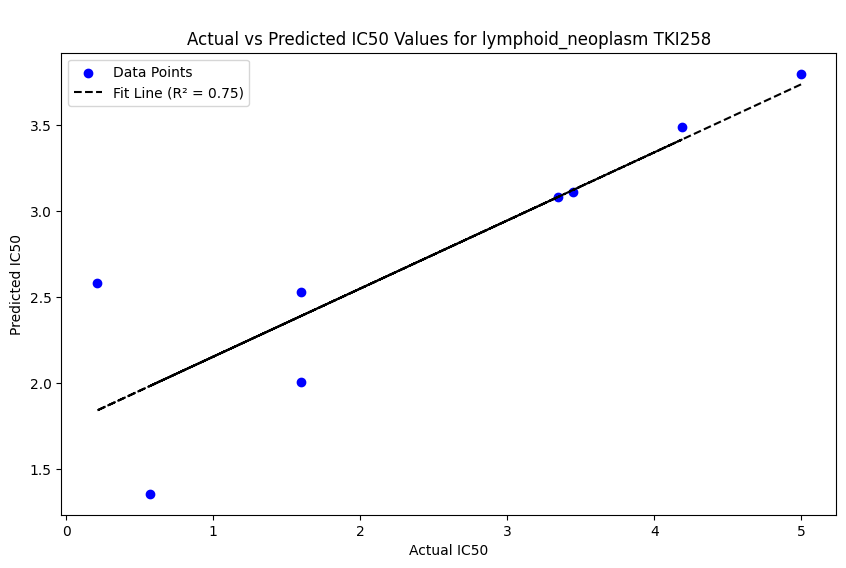

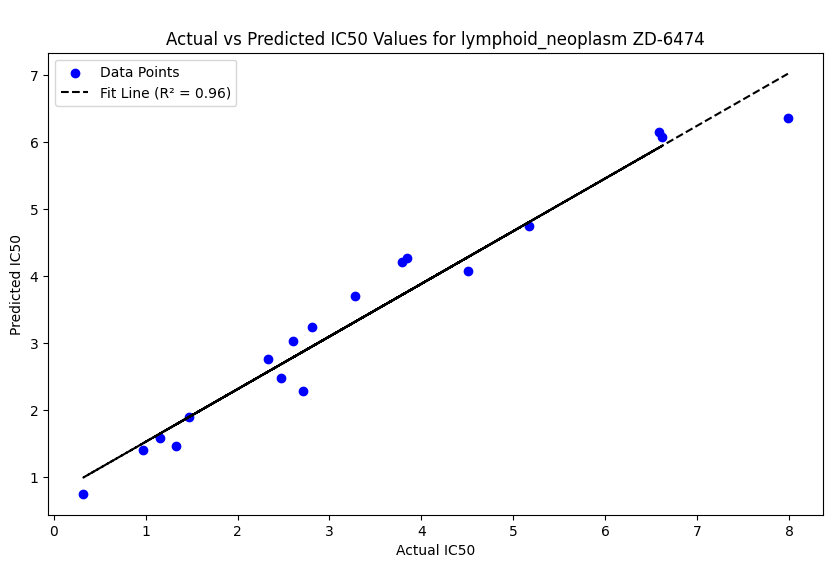

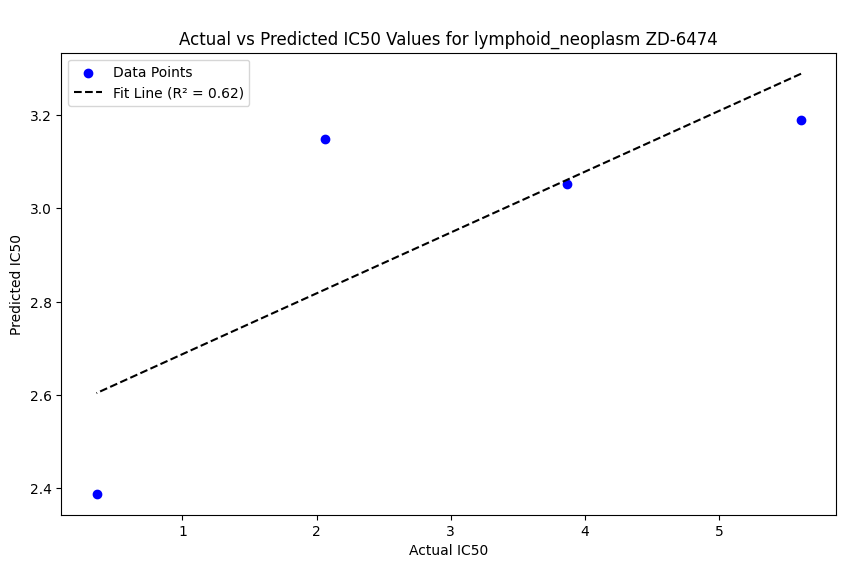

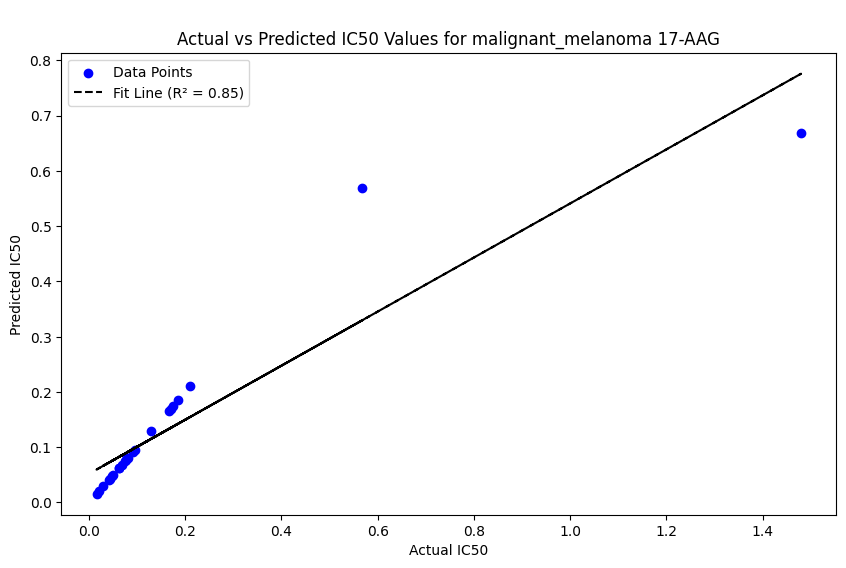

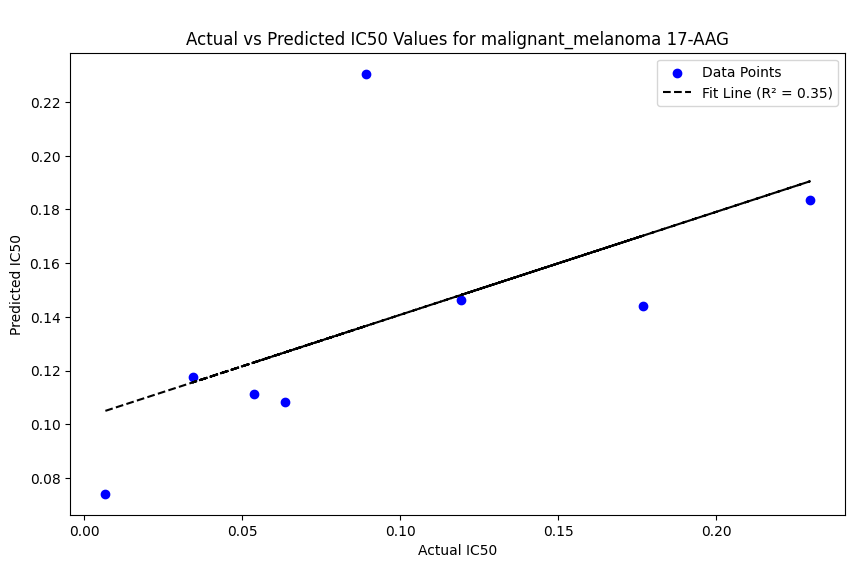

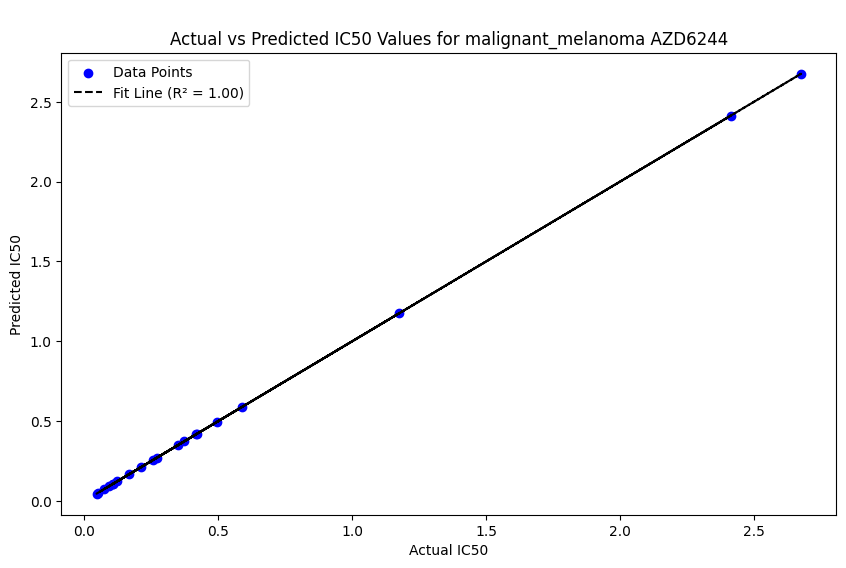

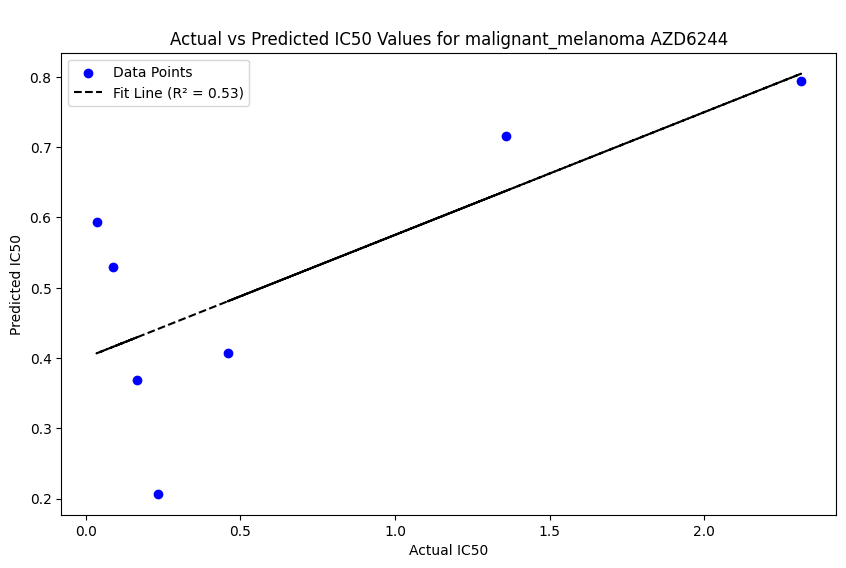

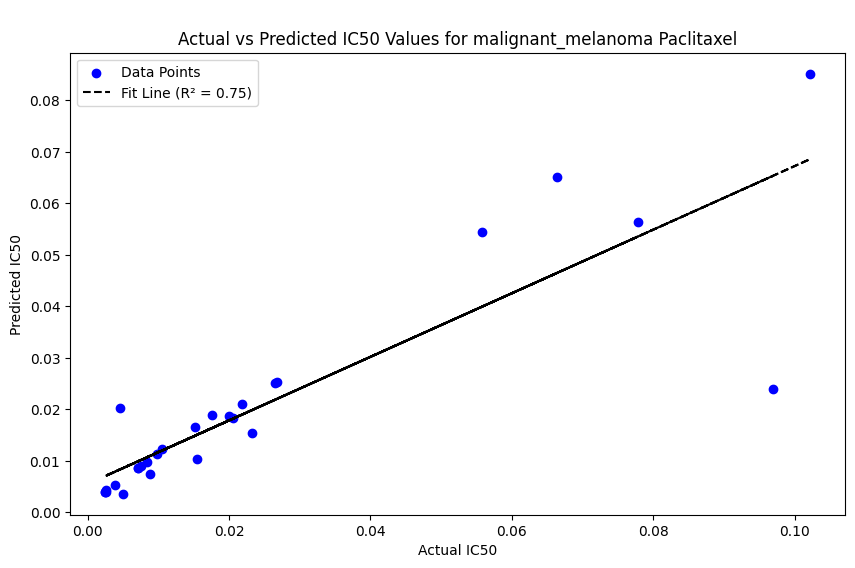

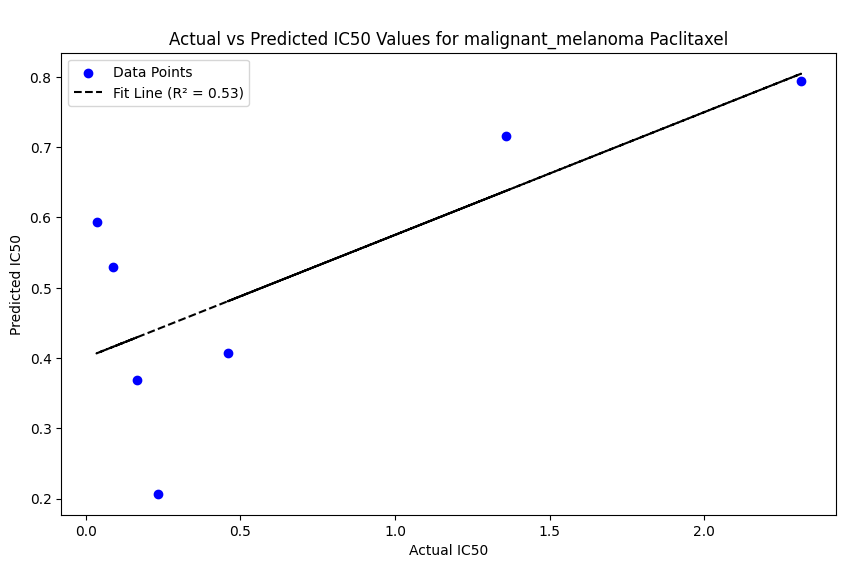

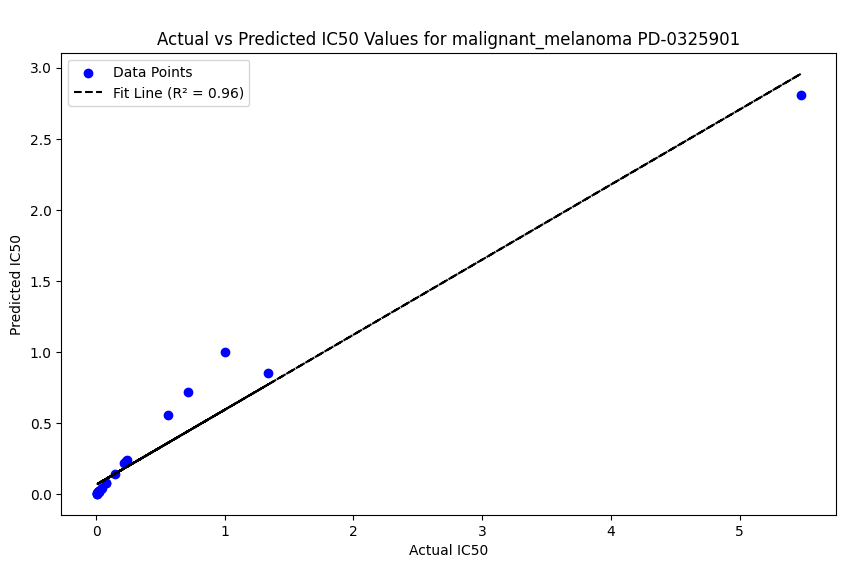

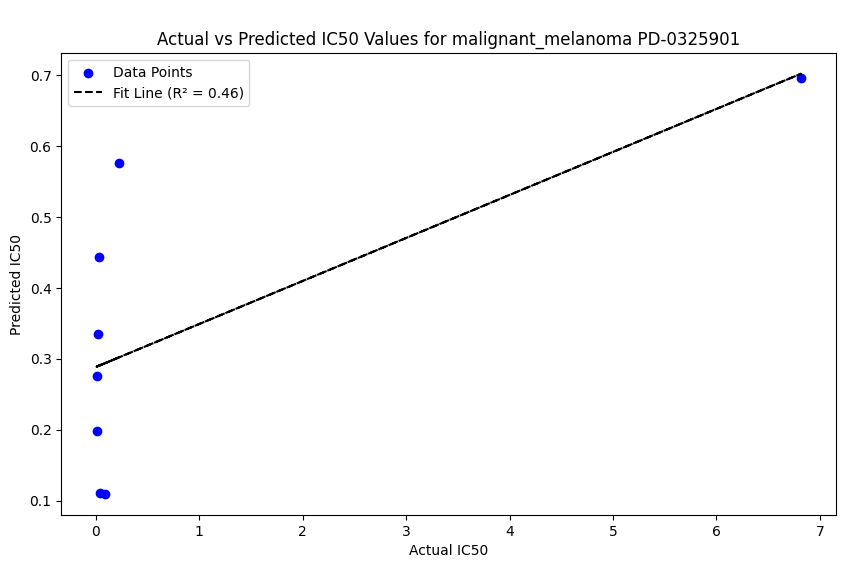

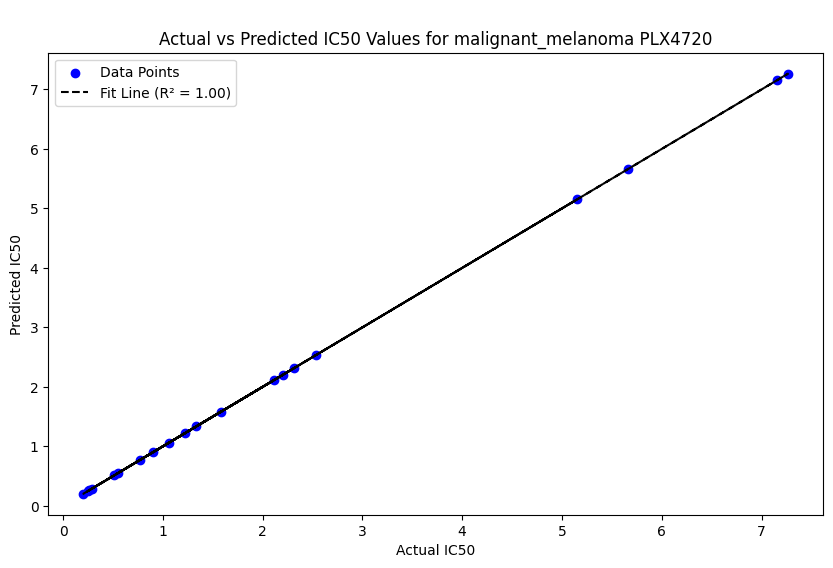

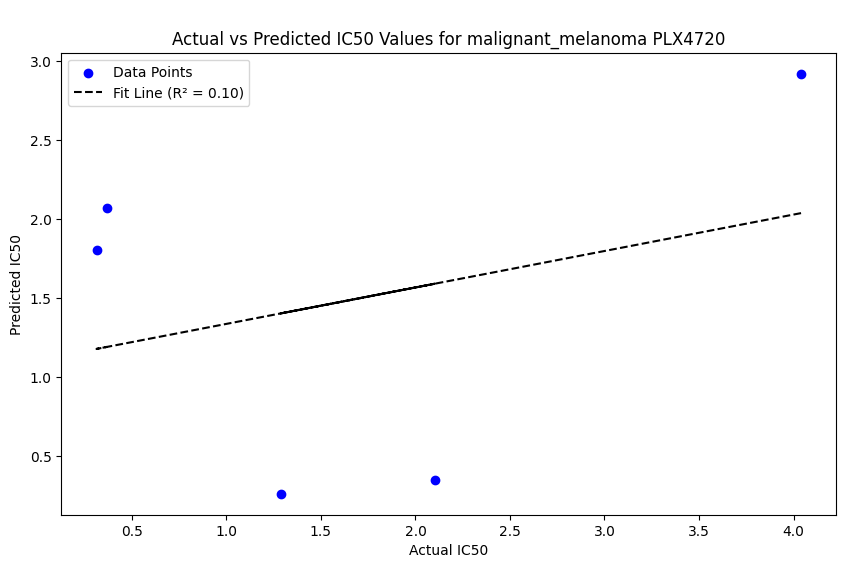

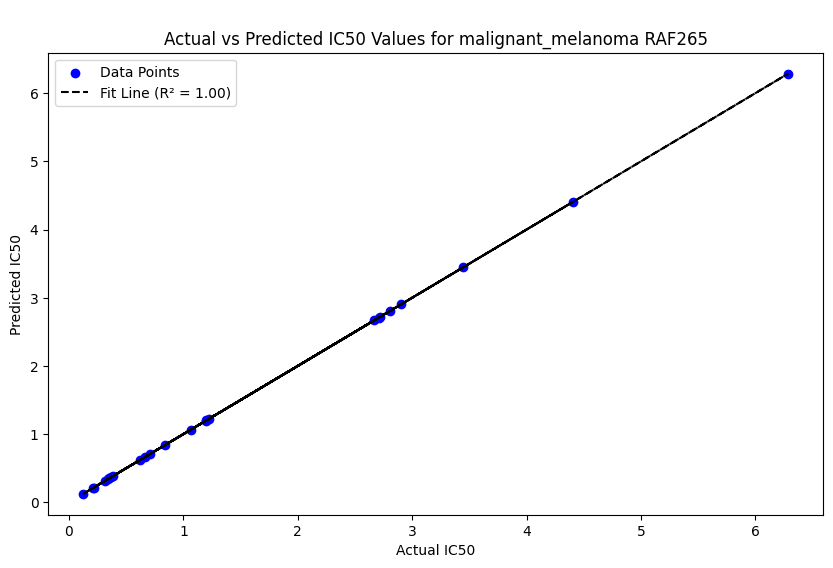

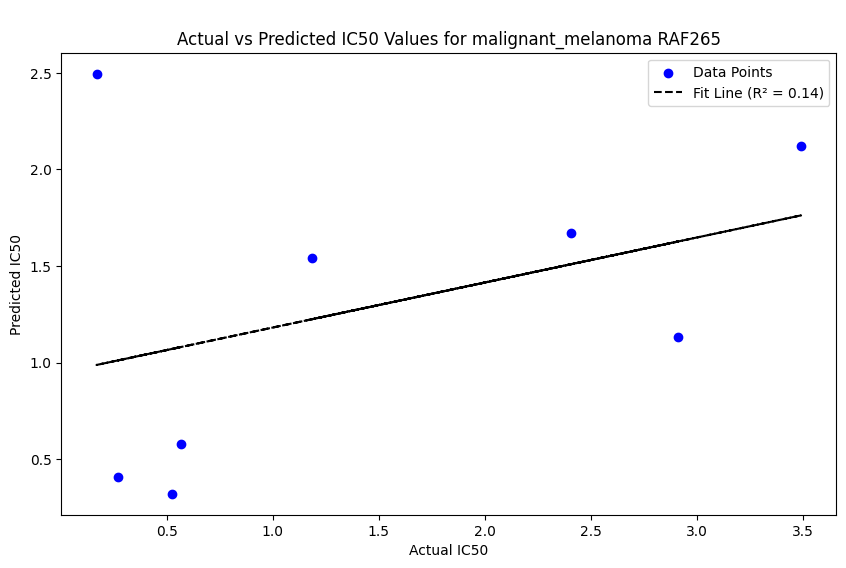

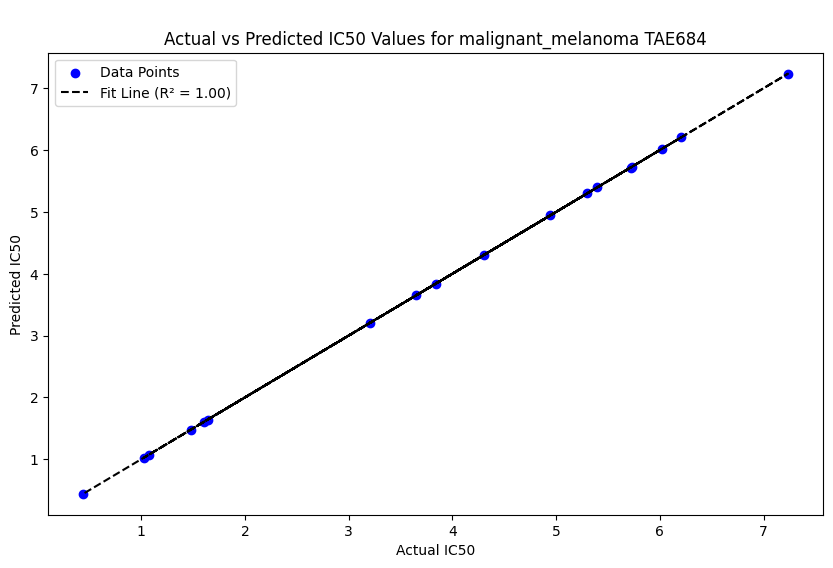

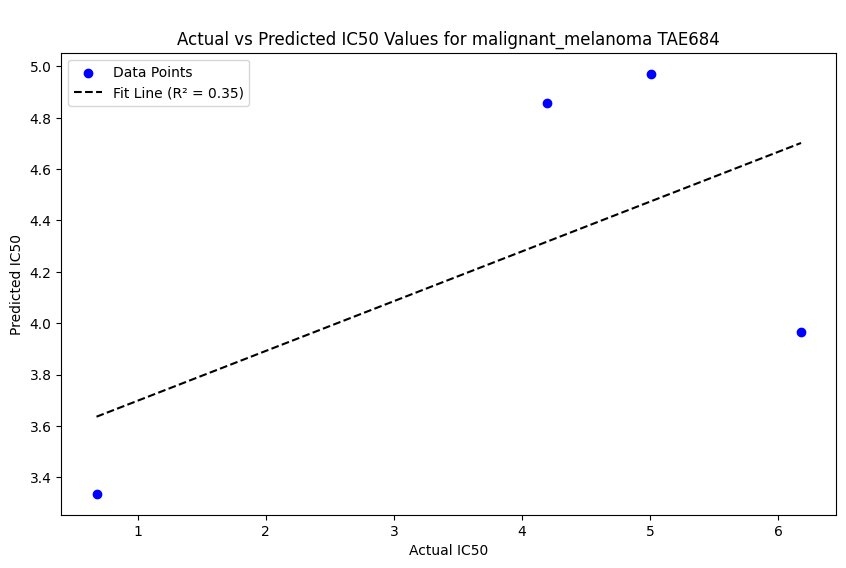

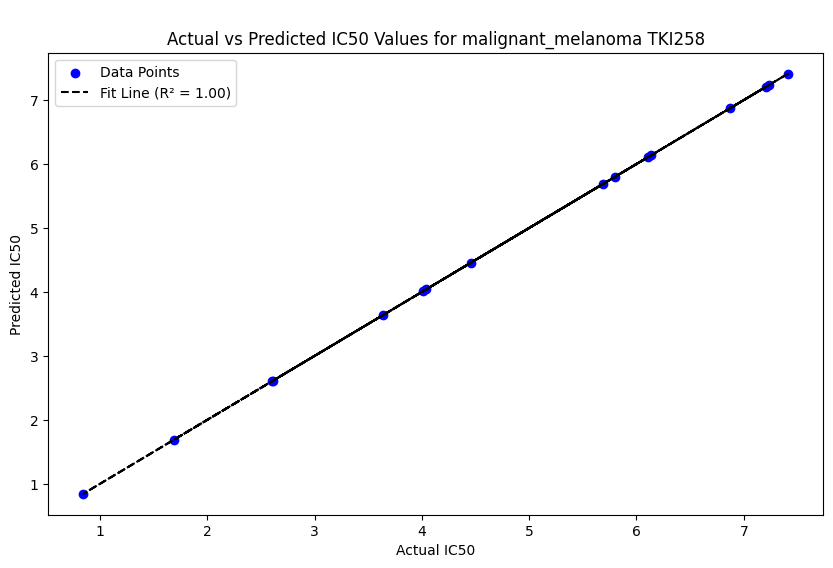

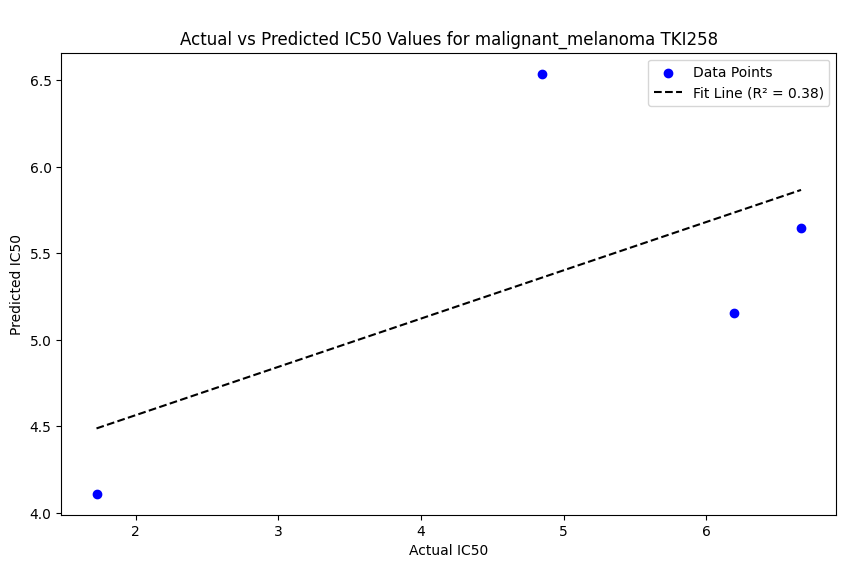

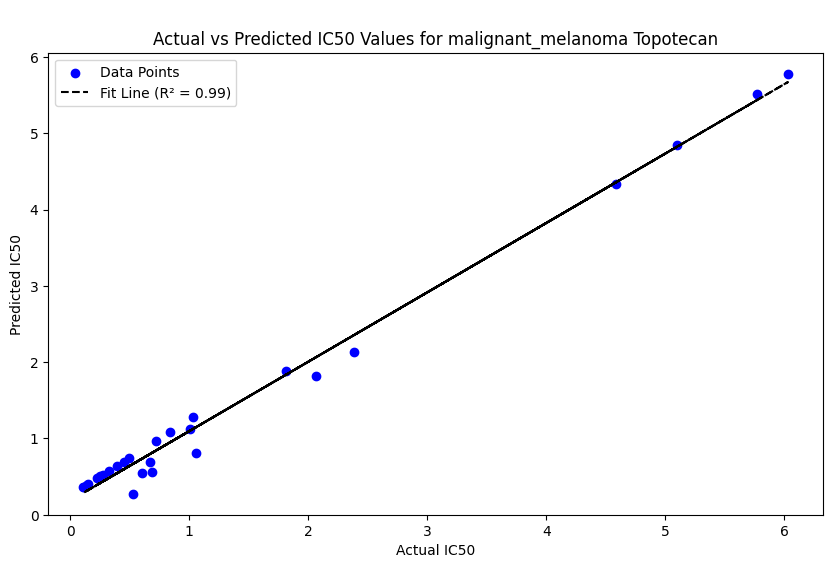

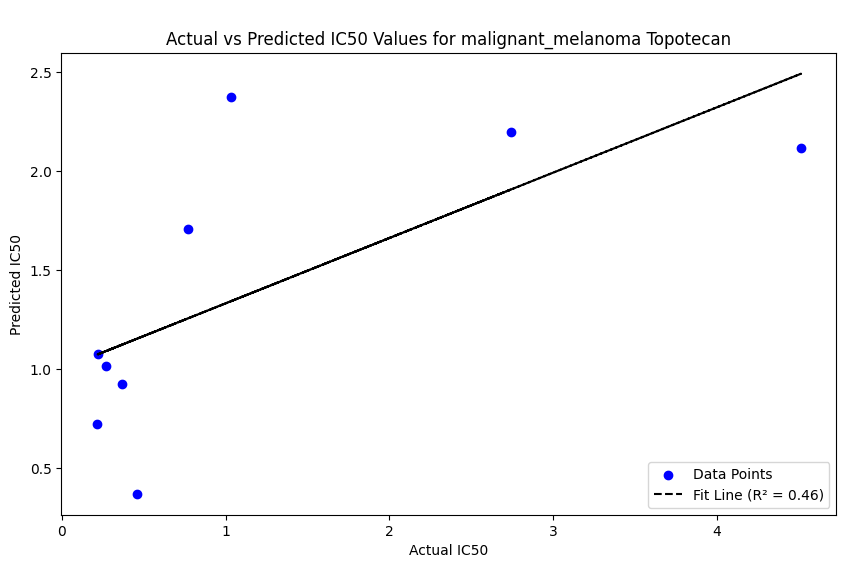

In [8]:
for histology in Histologies:
    os.chdir(os.path.join(output_dir_ccle,histology))
    drugs_for_histology_ccle = [item1 for item1 in os.listdir() if os.path.isdir(item1)]
    if len(drugs_for_histology_ccle) > 0:
        for drug in drugs_for_histology_ccle:
            os.chdir(os.path.join(output_dir_ccle,histology,drug))
            if os.path.exists('Support Vector Regression'):
                
            
                os.chdir(os.path.join(output_dir_ccle,histology, drug,"Support Vector Regression"))
                
                print(histology)
                print(drug)
                train_IC50_data = pd.read_csv(os.path.join(output_dir_ccle,histology,drug,"Support Vector Regression","Predict IC50 Train Data.tsv"),sep='\t')
                result_data = pd.read_csv(os.path.join(output_dir_ccle,histology,drug,"Support Vector Regression","Drug SVR Result.tsv"),sep='\t')

                actual_values = train_IC50_data.iloc[:, 0]
                predicted_values = train_IC50_data.iloc[:, 1]
                                                              
                r2 = result_data.loc[0,'R_Square_Train']   
                                                               
                fit = np.polyfit(actual_values, predicted_values, 1)
                fit_fn = np.poly1d(fit)
                                                           
                plt.figure(figsize=(10, 6))
                plt.scatter(actual_values, predicted_values, label='Data Points', color='blue')
                plt.plot(actual_values, fit_fn(actual_values), '--k', label=f'Fit Line (R² = {r2:.2f})')
                                                               
                plt.xlabel('Actual IC50')
                plt.ylabel('Predicted IC50')
                plt.title(f'\nActual vs Predicted IC50 Values for {histology} {drug}')
                                                               
                plt.legend()
                os.chdir(os.path.join(output_dir_ccle,histology,drug,"Support Vector Regression"))
                plt.savefig('Scatter Plot Train data.png')
                    
                    
                test_IC50_data = pd.read_csv(os.path.join(output_dir_ccle,histology,drug,"Support Vector Regression","Predict IC50 Test Data.tsv"), sep='\t')
                actual_values = test_IC50_data.iloc[:,0]
                predicted_values = test_IC50_data.iloc[:,1]
                                                            
                r2 = result_data.loc[0,'R_Square_Test']     
                                                               
                fit = np.polyfit(actual_values, predicted_values, 1)
                fit_fn = np.poly1d(fit)
                                                               
                plt.figure(figsize=(10, 6))
                plt.scatter(actual_values, predicted_values, label='Data Points', color='blue')
                plt.plot(actual_values, fit_fn(actual_values), '--k', label=f'Fit Line (R² = {r2:.2f})')
                                                               
                plt.xlabel('Actual IC50')
                plt.ylabel('Predicted IC50')
                plt.title(f'\nActual vs Predicted IC50 Values for {histology} {drug}')
                                                               
                plt.legend()
                os.chdir(os.path.join(output_dir_ccle,histology,drug,"Support Vector Regression"))
                plt.savefig('Scatter Plot Test data.png')
                    
                    
                    

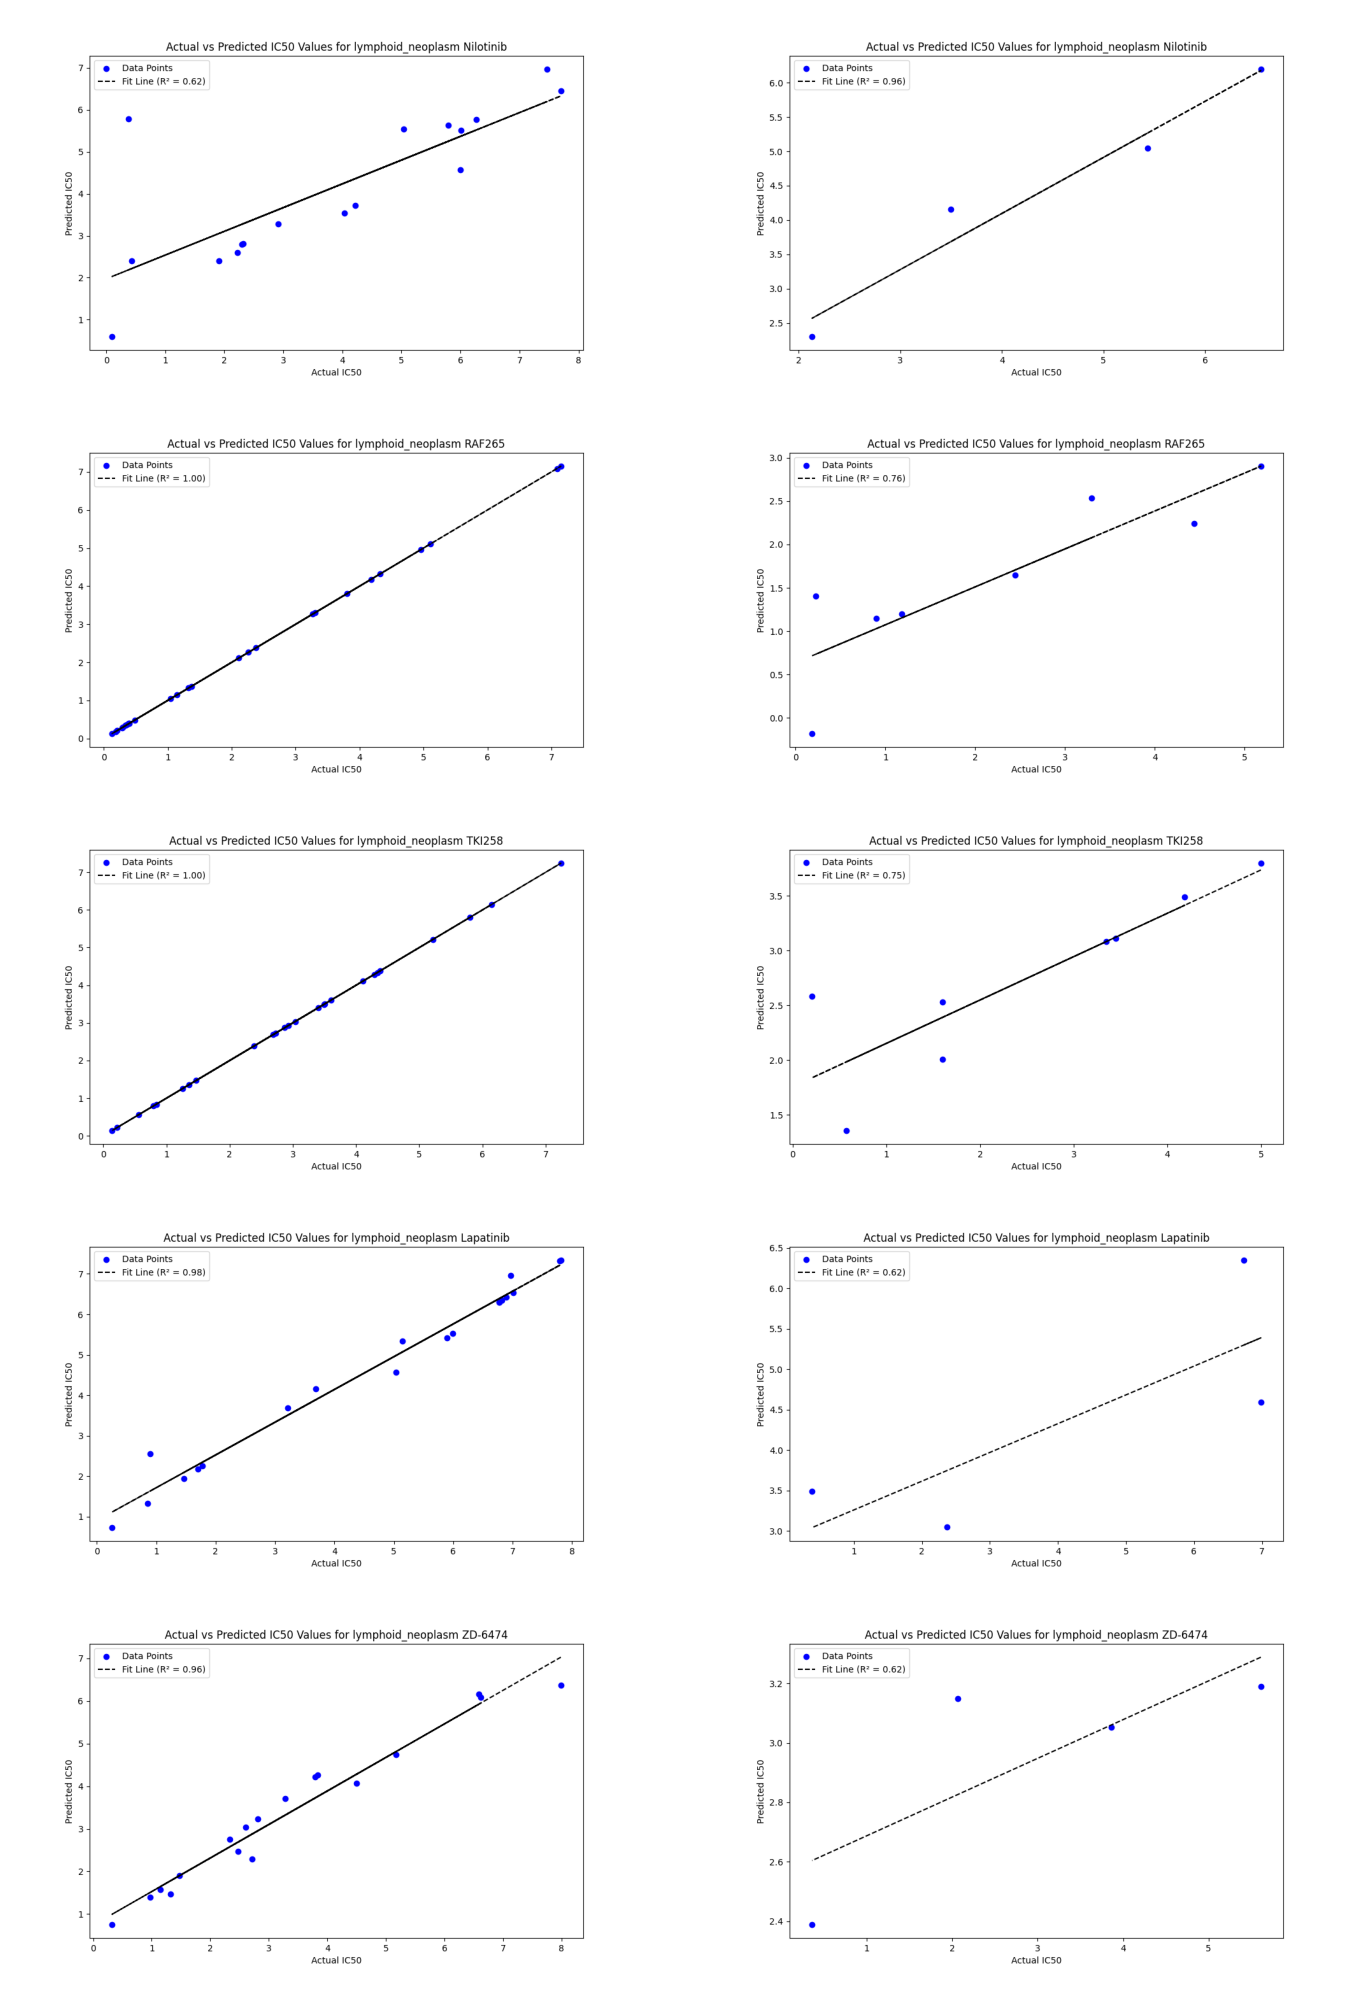

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Çalışma dizinini ayarlama
os.chdir('C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\ML RESULT')

# Görselleri yükleme
train_1_image_path = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT\\lymphoid_neoplasm\\Nilotinib\\Support Vector Regression\\Scatter Plot Train data.png'
test_1_image_path = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT\\lymphoid_neoplasm\\Nilotinib\\Support Vector Regression\\Scatter Plot Test data.png'

train_2_image_path = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT\\lymphoid_neoplasm\\RAF265\\Support Vector Regression\\Scatter Plot Train data.png'
test_2_image_path = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT\\lymphoid_neoplasm\\RAF265\\Support Vector Regression\\Scatter Plot Test data.png'

train_3_image_path = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT\\lymphoid_neoplasm\\TKI258\\Support Vector Regression\\Scatter Plot Train data.png'
test_3_image_path = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT\\lymphoid_neoplasm\\TKI258\\Support Vector Regression\\Scatter Plot Test data.png'

train_4_image_path = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT\\lymphoid_neoplasm\\Lapatinib\\Support Vector Regression\\Scatter Plot Train data.png'
test_4_image_path = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT\\lymphoid_neoplasm\\Lapatinib\\Support Vector Regression\\Scatter Plot Test data.png'

train_5_image_path = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT\\lymphoid_neoplasm\\ZD-6474\\Support Vector Regression\\Scatter Plot Train data.png'
test_5_image_path = 'C:\\Users\\MONSTER\\Desktop\\TEZ SON\\CCLE\\OUTPUT\\lymphoid_neoplasm\\ZD-6474\\Support Vector Regression\\Scatter Plot Test data.png'

# Görselleri yükleme
train_image_1 = Image.open(train_1_image_path)
test_image_1 = Image.open(test_1_image_path)

train_image_2 = Image.open(train_2_image_path)
test_image_2 = Image.open(test_2_image_path)

train_image_3 = Image.open(train_3_image_path)
test_image_3 = Image.open(test_3_image_path)

train_image_4 = Image.open(train_4_image_path)
test_image_4 = Image.open(test_4_image_path)

train_image_5 = Image.open(train_5_image_path)
test_image_5 = Image.open(test_5_image_path)

# Alt grafik (subplot) oluşturma
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Görselleri alt grafiklere yerleştirme
axes[0, 0].imshow(train_image_1)
axes[0, 0].axis('off')  # Eksenleri gizleme

axes[0, 1].imshow(test_image_1)
axes[0, 1].axis('off')  # Eksenleri gizleme

axes[1, 0].imshow(train_image_2)
axes[1, 0].axis('off')  # Eksenleri gizleme

axes[1, 1].imshow(test_image_2)
axes[1, 1].axis('off')  # Eksenleri gizleme

axes[2, 0].imshow(train_image_3)
axes[2, 0].axis('off')  # Eksenleri gizleme

axes[2, 1].imshow(test_image_3)
axes[2, 1].axis('off')  # Eksenleri gizleme

axes[3, 0].imshow(train_image_4)
axes[3, 0].axis('off')  # Eksenleri gizleme

axes[3, 1].imshow(test_image_4)
axes[3, 1].axis('off')  # Eksenleri gizleme

axes[4, 0].imshow(train_image_5)
axes[4, 0].axis('off')  # Eksenleri gizleme

axes[4, 1].imshow(test_image_5)
axes[4, 1].axis('off')  # Eksenleri gizleme

# Alt grafikler arasında boşluk bırakma
plt.tight_layout()

# Grafik kaydetme
plt.savefig('Scatter Plot of best Result SVR - REG.png')

# Grafiği gösterme
plt.show()
